In [213]:
import pandas as pd
import numpy as np
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [214]:
house_data = pd.read_csv(r"D:\GENEL\SPRINGBOARD\PROJECTS\CAPSTONE PROJECTS\CAPSTONE PROJECT-1\kc_house_data.csv\kc_house_data.csv", parse_dates = ['date'])

In [215]:
house_data.head(5)

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [216]:
house_data.info() # There are 21613 rows and there is no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [217]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Columns:
**id:** A notation for a house  
**date:** Date house was sold  
**price:** Price is prediction target  
**bedrooms:** Number of Bedrooms/House  
**bathrooms:** Number of bathrooms/House  
**sqft_living:** Square footage of the home  
**sqft_lot:** Square footage of the lot  
**floorsTotal:** Floors (levels) in house  
**waterfront:** House which has a view to a waterfront  
**view:** Has been viewed  
**condition:** How good the condition is ( Overall )  
**grade:** Overall grade given to the housing unit, based on King County grading system  
**sqft_above:** Square footage of house apart from basement  
**sqft_basement:** Square footage of the basement  
**yr_built:** Built Year  
**yr_renovated:** Year when house was renovated  
**zipcode:** Zip Code  
**lat:** Latitude coordinate  
**long:** Longitude coordinate  
**sqft_living15:** Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area  
**sqft_lot15:** LotSize area in 2015(implies-- some renovations)  

**TOTAL VIEW QUALITY:** This is the sum of all view's quality. The view's quality can vary from 0 to 4, in 5 different categories; Puget Sound, City/Territorial, Lake Washington/Sammamish, Mountain, and Small Lake/River. https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=k  

**VIEW:** For each classification will display blank for no view or "Fair", "Average", "Good" or "Excellent" to reflect the quality of view for that unit.(0	Unknown, 1	Fair, 2	Average, 3	Good, 4	Excellent)  
 https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=k   

**sqft_living15** - The avarage square footage of interior housing living space for the nearest 15 neighbors https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

**sqft_lot15** - The avarage square footage of the land lots of the nearest 15 neighbors https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html

In [218]:
len(house_data.id.unique())

21436

In [219]:
house_data_duplicates = house_data[house_data.duplicated('id')]
house_data_duplicates #There are 177 dublicated rows.

id       date      price  bedrooms  bathrooms  sqft_living  \
94     6021501535 2014-12-23   700000.0         3       1.50         1580   
314    4139480200 2014-12-09  1400000.0         4       3.25         4290   
325    7520000520 2015-03-11   240500.0         2       1.00         1240   
346    3969300030 2014-12-29   239900.0         4       1.00         1000   
372    2231500030 2015-03-24   530000.0         4       2.25         2180   
718    8820903380 2015-01-02   730000.0         6       2.25         2660   
824     726049190 2015-02-18   431000.0         3       1.00         1810   
837    8682262400 2015-05-13   419950.0         2       1.75         1350   
1086   9834200885 2015-04-20   550000.0         4       2.50         2080   
1129   8062900070 2015-02-13   369000.0         5       1.50         2550   
1203   1231000510 2015-05-04   510000.0         3       1.75         1490   
1235   6117501820 2015-04-28   435000.0         2       1.00          790   
1451   2228900270 2015-02-12   302000.0         2       1.00         1010   
1465   3630120700 2015-01-07   765000.0         3       3.25         3190   
1577   7888000390 2015-04-01   235000.0         3       1.00         1060   
1865   2143700830 2015-03-12   370000.0         4       2.50         2100   
2039   3395040550 2015-04-29   320000.0         3       2.50         1530   
2127   4345000510 2015-04-28   325000.0         3       2.50         1800   
2494   9407110710 2015-02-26   322000.0         3       1.75         1510   
2497      1000102 2015-04-22   300000.0         6       3.00         2400   
2503   1781500435 2015-02-25   575000.0         3       1.75         1580   
2532   1232000810 2015-03-26   537000.0         3       2.50         1400   
2565   7856400240 2015-02-11  1650000.0         4       3.00         3900   
2632   7983000200 2015-02-25   250000.0         3       1.00         1300   
2977   9136103130 2015-05-12   685000.0         2       1.50         1090   
3034   5083000375 2015-03-19   235000.0         3       1.00         1310   
3299   7409700215 2015-03-13   921500.0         3       1.50         1900   
3541   1823049202 2015-01-07   326000.0         6       1.50         1930   
3624   2767602141 2014-12-22   650000.0         3       1.50         1380   
3757   1254200015 2015-04-08   625000.0         3       2.50         2260   
...           ...        ...        ...       ...        ...          ...   
16013  5536100020 2015-05-12  1190000.0         3       2.00         2160   
16672  9250900104 2015-04-10   496000.0         5       1.75         2110   
16815     7200179 2015-04-24   175000.0         2       1.00          840   
17067  8651402750 2015-04-30   219950.0         3       1.50         1210   
17134  6143000020 2015-04-06   299000.0         3       1.75         1910   
17205  4139440480 2014-12-01   796500.0         3       2.75         2590   
17281  2473380920 2015-02-27   339000.0         5       2.50         1720   
17291  1974300020 2015-02-18   624900.0         4       2.50         2270   
17382   641900050 2015-02-06   499950.0         4       2.25         2160   
17483  7387500235 2015-03-17   363000.0         3       1.75         1960   
17581  1423049019 2015-03-31   220000.0         2       1.00          580   
17603   795000620 2014-12-15   124000.0         3       1.00         1080   
17604   795000620 2015-03-11   157000.0         3       1.00         1080   
17764  1630700361 2015-04-09   583500.0         4       1.75         2860   
17852  6791200120 2015-04-07   515000.0         3       2.25         1820   
18234  6751300375 2014-10-16   522500.0         3       1.00         1520   
18565  7657000540 2015-03-04   260000.0         4       1.00         1220   
18704  3558900590 2015-03-24   692500.0         6       1.75         2230   
18706  8121100395 2015-03-11   645000.0         4       1.50         1600   
18763  3332000615 2015-04-22   389000.0         3       1.00         1330   
18992  7856

In [220]:
house_data.drop_duplicates(['id'], keep = 'last', inplace=True) # There are 177 dublicated rows. I kept the last entries.

In [221]:
h_data = house_data
h_data.reset_index(drop=True, inplace=True)
h_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21436 entries, 0 to 21435
Data columns (total 21 columns):
id               21436 non-null int64
date             21436 non-null datetime64[ns]
price            21436 non-null float64
bedrooms         21436 non-null int64
bathrooms        21436 non-null float64
sqft_living      21436 non-null int64
sqft_lot         21436 non-null int64
floors           21436 non-null float64
waterfront       21436 non-null int64
view             21436 non-null int64
condition        21436 non-null int64
grade            21436 non-null int64
sqft_above       21436 non-null int64
sqft_basement    21436 non-null int64
yr_built         21436 non-null int64
yr_renovated     21436 non-null int64
zipcode          21436 non-null int64
lat              21436 non-null float64
long             21436 non-null float64
sqft_living15    21436 non-null int64
sqft_lot15       21436 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.4 MB


In [222]:
h_data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [223]:
h_data.drop(['id', 'date', 'lat', 'long'], axis = 1, inplace=True) #Let's reduce the dataset by dropping columns that won't be used during the analysis.

In [224]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21436 entries, 0 to 21435
Data columns (total 17 columns):
price            21436 non-null float64
bedrooms         21436 non-null int64
bathrooms        21436 non-null float64
sqft_living      21436 non-null int64
sqft_lot         21436 non-null int64
floors           21436 non-null float64
waterfront       21436 non-null int64
view             21436 non-null int64
condition        21436 non-null int64
grade            21436 non-null int64
sqft_above       21436 non-null int64
sqft_basement    21436 non-null int64
yr_built         21436 non-null int64
yr_renovated     21436 non-null int64
zipcode          21436 non-null int64
sqft_living15    21436 non-null int64
sqft_lot15       21436 non-null int64
dtypes: float64(3), int64(14)
memory usage: 2.8 MB


In [225]:
len(h_data.zipcode.unique())

70

In [226]:
print(h_data.waterfront.unique())

[0 1]


In [227]:
print(h_data.view.unique())

[0 3 4 2 1]


In [228]:
print(h_data.condition.unique())

[3 5 4 1 2]


In [229]:
print(h_data.grade.unique())

[ 7  6  8 11  9  5 10 12  4  3 13  1]


In [230]:
print(h_data.bathrooms.unique())

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


In [231]:
print(h_data.bedrooms.unique())

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


In [232]:
h_data[h_data.bedrooms >= 10] # Most likely there is a mistake at the line which bedroom number is 33. 

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8688    520000.0        11       3.00         3000      4960     2.0   
13195  1148000.0        10       5.25         4590     10920     1.0   
15025   650000.0        10       2.00         3610     11914     2.0   
15724   640000.0        33       1.75         1620      6000     1.0   
19085   660000.0        10       3.00         2920      3745     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
8688            0     0          3      7        2400            600   
13195           0     2          3      9        2500           2090   
15025           0     0          4      7        3010            600   
15724           0     0          5      7        1040            580   
19085           0     0          4      7        1860           1060   

       yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  
8688       1918          1999    98106           1420        4960  
13195      2008             0    98004           2730       10400  
15025      1958             0    98006           2040       11914  
15724      1947             0    98103           1330        4700  
19085      1913             0    98105           1810        3745

In [233]:
indexNames = h_data[ h_data['bedrooms'] == 33 ].index
h_data.drop(indexNames , inplace=True)
h_data.reset_index(drop=True, inplace=True)

In [234]:
h_data[h_data.bedrooms >= 10]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
8688    520000.0        11       3.00         3000      4960     2.0   
13195  1148000.0        10       5.25         4590     10920     1.0   
15025   650000.0        10       2.00         3610     11914     2.0   
19084   660000.0        10       3.00         2920      3745     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
8688            0     0          3      7        2400            600   
13195           0     2          3      9        2500           2090   
15025           0     0          4      7        3010            600   
19084           0     0          4      7        1860           1060   

       yr_built  yr_renovated  zipcode  sqft_living15  sqft_lot15  
8688       1918          1999    98106           1420        4960  
13195      2008             0    98004           2730       10400  
15025      1958             0    98006           2040       11914  
19084      1913             0    98105           1810        3745

In [235]:
print('bathroom = 0 count:', len(h_data[h_data.bathrooms == 0]))
print('bedroom = 0 count:', len(h_data[h_data.bedrooms == 0]))

bathroom = 0 count: 10
bedroom = 0 count: 13


In [236]:
print(len(h_data[(h_data.bedrooms == 0) & (h_data.bathrooms == 0)]))

7


In [237]:
#indexNames = h_data[ h_data['bedrooms'] == 33 ].index
h_data.drop(h_data[ h_data['bedrooms'] == 0 ].index , inplace=True)
h_data.drop(h_data[ h_data['bathrooms'] == 0 ].index , inplace=True)
h_data.reset_index(drop=True, inplace=True)

In [238]:
h_data.drop_duplicates(keep = 'last', inplace=True)

In [239]:
h_data.reset_index(drop=True, inplace=True)
h_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 17 columns):
price            21416 non-null float64
bedrooms         21416 non-null int64
bathrooms        21416 non-null float64
sqft_living      21416 non-null int64
sqft_lot         21416 non-null int64
floors           21416 non-null float64
waterfront       21416 non-null int64
view             21416 non-null int64
condition        21416 non-null int64
grade            21416 non-null int64
sqft_above       21416 non-null int64
sqft_basement    21416 non-null int64
yr_built         21416 non-null int64
yr_renovated     21416 non-null int64
zipcode          21416 non-null int64
sqft_living15    21416 non-null int64
sqft_lot15       21416 non-null int64
dtypes: float64(3), int64(14)
memory usage: 2.8 MB


In [240]:
h_data['floors'] = h_data['floors'].astype('category',ordered=True)
h_data['waterfront'] = h_data['waterfront'].astype('category')
h_data['view'] = h_data['view'].astype('category', ordered=True)
h_data['condition'] = h_data['condition'].astype('category',ordered=True)
h_data['grade'] = h_data['grade'].astype('category',ordered=True)
h_data['zipcode'] = h_data['zipcode'].astype(str)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


In [241]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 17 columns):
price            21416 non-null float64
bedrooms         21416 non-null int64
bathrooms        21416 non-null float64
sqft_living      21416 non-null int64
sqft_lot         21416 non-null int64
floors           21416 non-null category
waterfront       21416 non-null category
view             21416 non-null category
condition        21416 non-null category
grade            21416 non-null category
sqft_above       21416 non-null int64
sqft_basement    21416 non-null int64
yr_built         21416 non-null int64
yr_renovated     21416 non-null int64
zipcode          21416 non-null object
sqft_living15    21416 non-null int64
sqft_lot15       21416 non-null int64
dtypes: category(5), float64(2), int64(9), object(1)
memory usage: 2.1+ MB


# EDA

In [242]:
pandas_profiling.ProfileReport(h_data)

In [243]:
h_data.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.141600e+04  21416.000000  21416.000000  21416.000000  2.141600e+04   
mean   5.417845e+05      3.372572      2.118428   2083.228941  1.513038e+04   
std    3.673477e+05      0.902955      0.768782    918.850976  4.153431e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.249500e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.505500e+05      3.000000      2.250000   1920.000000  7.615000e+03   
75%    6.451250e+05      4.000000      2.500000   2550.000000  1.069525e+04   
max    7.700000e+06     11.000000      8.000000  13540.000000  1.651359e+06   

         sqft_above  sqft_basement      yr_built  yr_renovated  sqft_living15  \
count  21416.000000   21416.000000  21416.000000  21416.000000   21416.000000   
mean    1791.255417     291.973524   1971.088392     84.808928    1988.488840   
std      828.713991     442.903323     29.385416    402.610554     685.548581   
min      370.000000       0.000000   1900.000000      0.000000     399.000000   
25%     1200.000000       0.000000   1952.000000      0.000000    1490.000000   
50%     1560.000000       0.000000   1975.000000      0.000000    1840.000000   
75%     2220.000000     560.000000   1997.000000      0.000000    2370.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000    6210.000000   

          sqft_lot15  
count   21416.000000  
mean    12777.649935  
std     27347.802844  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10087.000000  
max    871200.000000

In [244]:
h_data.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price          1.000000  0.316959   0.525243     0.701301  0.088780   
bedrooms       0.316959  1.000000   0.528937     0.594221  0.033632   
bathrooms      0.525243  0.528937   1.000000     0.755551  0.087783   
sqft_living    0.701301  0.594221   0.755551     1.000000  0.172562   
sqft_lot       0.088780  0.033632   0.087783     0.172562  1.000000   
sqft_above     0.604456  0.493511   0.686347     0.876528  0.183193   
sqft_basement  0.323930  0.309369   0.283253     0.434541  0.015229   
yr_built       0.051140  0.160390   0.506280     0.316798  0.052377   
yr_renovated   0.126690  0.018747   0.050906     0.055009  0.007667   
sqft_living15  0.583809  0.406223   0.569484     0.756165  0.143770   
sqft_lot15     0.082019  0.031778   0.087764     0.183806  0.717737   

               sqft_above  sqft_basement  yr_built  yr_renovated  \
price            0.604456       0.323930  0.051140      0.126690   
bedrooms         0.493511       0.309369  0.160390      0.018747   
bathrooms        0.686347       0.283253  0.506280      0.050906   
sqft_living      0.876528       0.434541  0.316798      0.055009   
sqft_lot         0.183193       0.015229  0.052377      0.007667   
sqft_above       1.000000      -0.052642  0.423111      0.022610   
sqft_basement   -0.052642       1.000000 -0.134449      0.071816   
yr_built         0.423111      -0.134449  1.000000     -0.225734   
yr_renovated     0.022610       0.071816 -0.225734      1.000000   
sqft_living15    0.731863       0.199363  0.324898     -0.002732   
sqft_lot15       0.194421       0.017546  0.070205      0.007946   

               sqft_living15  sqft_lot15  
price               0.583809    0.082019  
bedrooms            0.406223    0.031778  
bathrooms           0.569484    0.087764  
sqft_living         0.756165    0.183806  
sqft_lot            0.143770    0.717737  
sqft_above          0.731863    0.194421  
sqft_basement       0.199363    0.017546  
yr_built            0.324898    0.070205  
yr_renovated       -0.002732    0.007946  
sqft_living15       1.000000    0.182723  
sqft_lot15          0.182723    1.000000

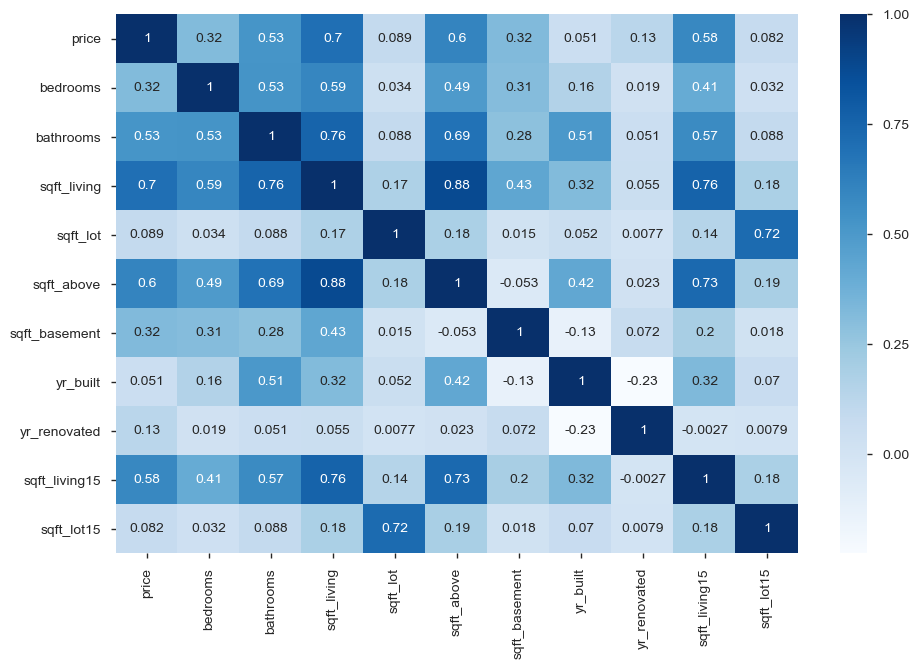

In [245]:
plt.subplots(figsize=(11,7))
sns.heatmap(h_data.corr(), cmap='Blues', annot = True)

### 1. Associations and Correlations between Variables  

Let's analyze now the relationship between the independent variables available in the dataset and the dependent variable that we are trying to predict (i.e., price). These analysis should provide some interesting insights for our regression models.

We'll be using scatterplots and correlations coefficients (e.g., Pearson, Spearman) to explore potential associations between the variables.

   #### a. Continuous Variables  

Let's analyze the relationship between **'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'** and **'price'.** Since variables are measured on a continuous scale, we can use Pearson's coefficient r to measures the strength and direction of the relationship.

In [246]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462:

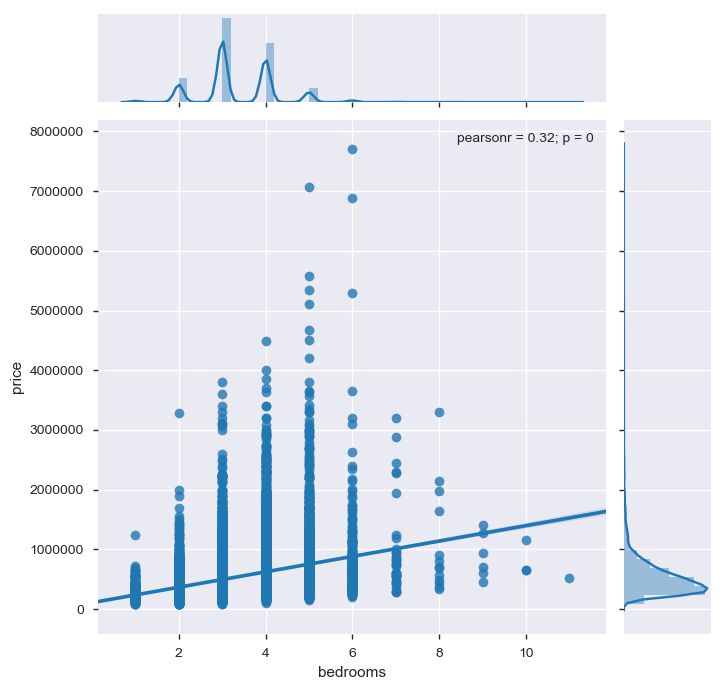

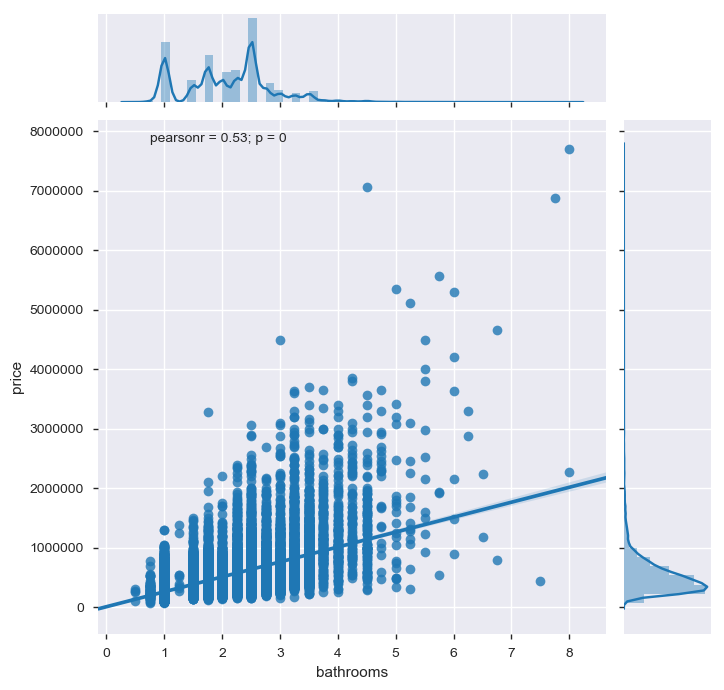

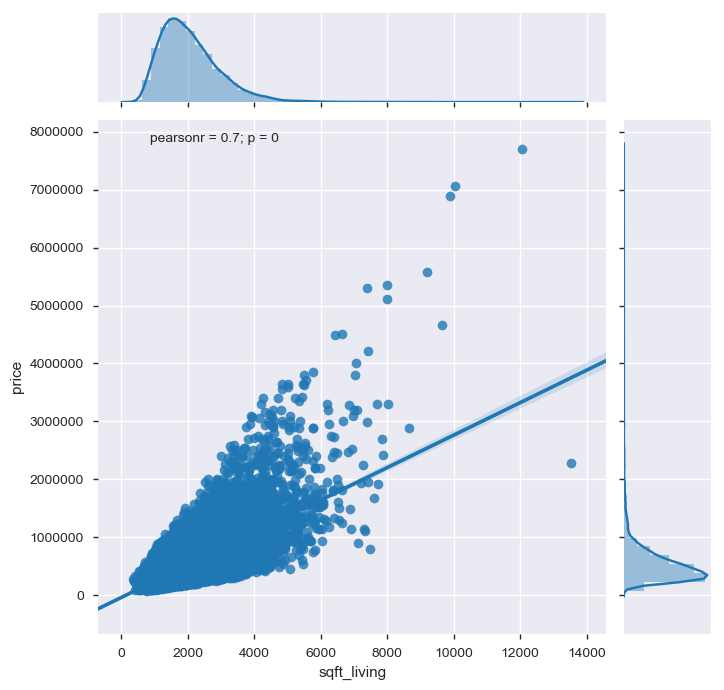

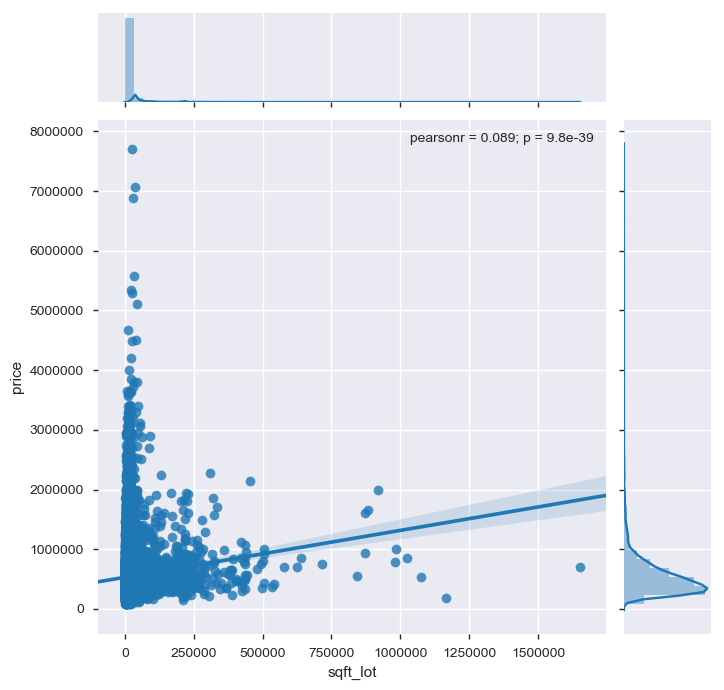

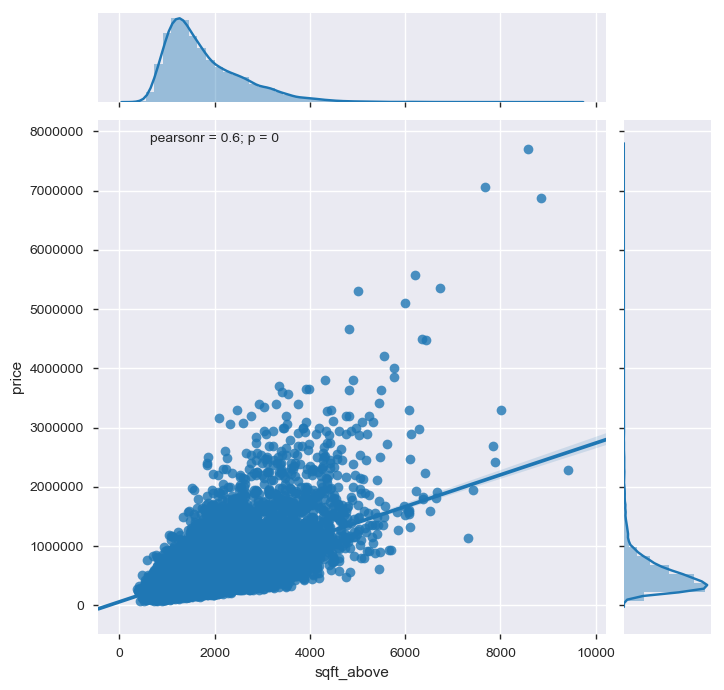

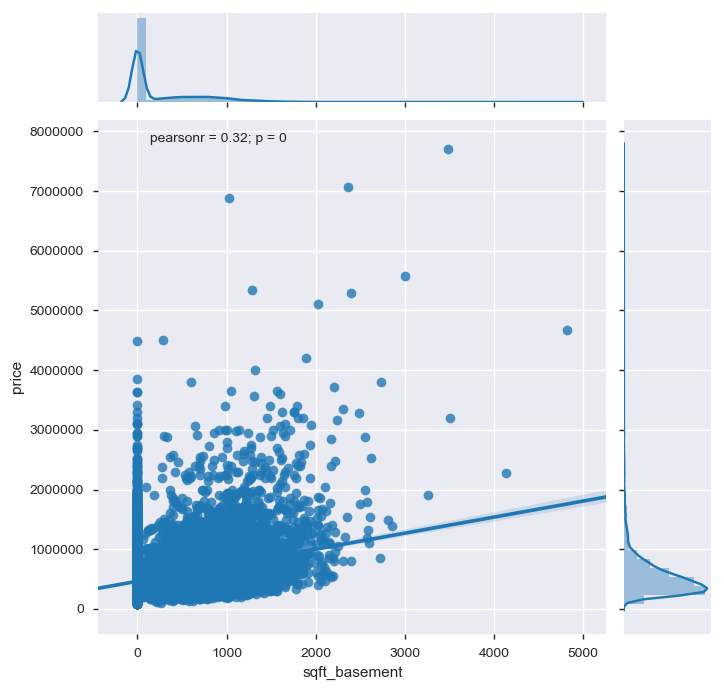

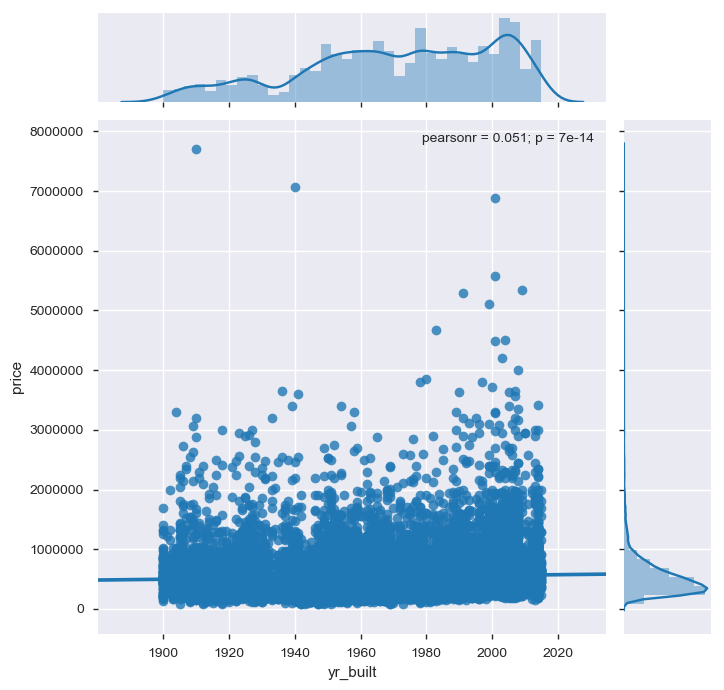

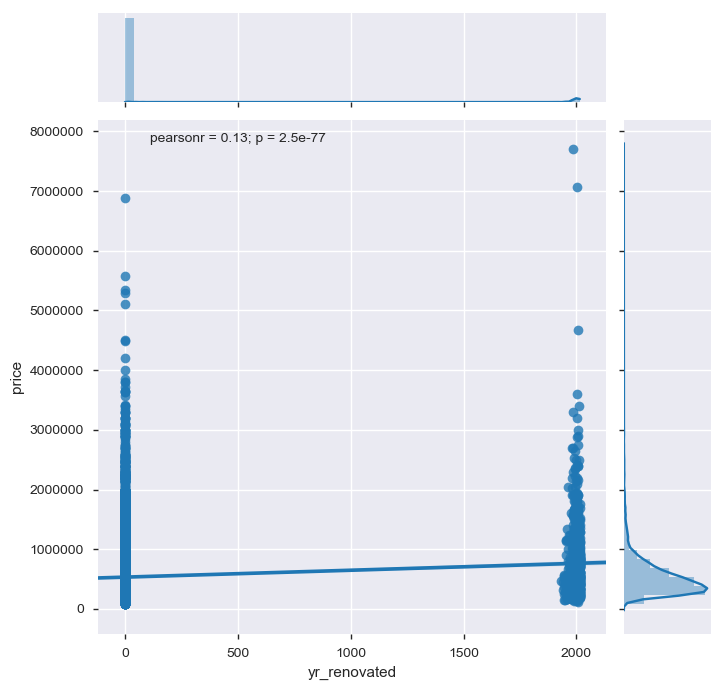

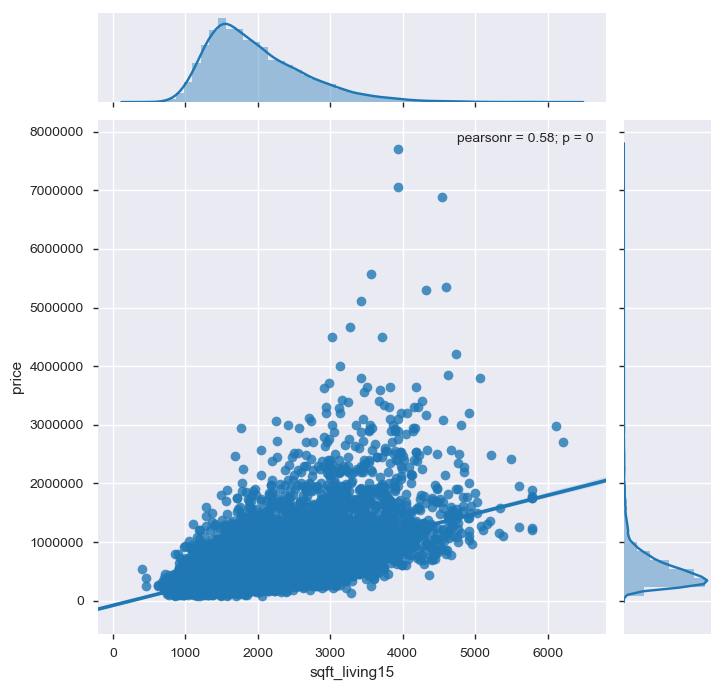

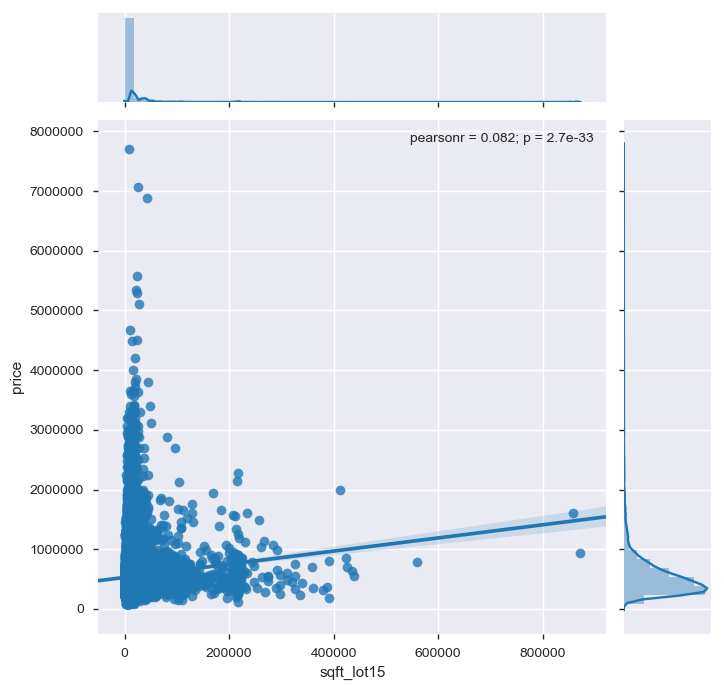

In [247]:
# A joint plot is used to visualize the bivariate distribution
sns.jointplot(x="bedrooms", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="bathrooms", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="sqft_living", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="sqft_lot", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="sqft_above", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="sqft_basement", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="yr_built", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="yr_renovated", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="sqft_living15", y="price", data=h_data, kind = 'reg', size = 7)
sns.jointplot(x="sqft_lot15", y="price", data=h_data, kind = 'reg', size = 7)
plt.show()

There is a clear linear association **(pearsonr >= 0.5 )** between the variable **'sqft_living' (pearsonr = 0.7), 'sqft_above'  (pearsonr = 0.6), 'sqft_living15' (pearsonr = 0.58), and 'bathrooms'(r = 0.52)** and **'price'**, indicating a strong positive relationship. They should be a good predicator of house price. 

The variables **'bedrooms' (pearsonr = 0.32), 'sqft_basement' (pearsonr = 0.32), 'yr_renovated' (pearsonr = 0.13)** has weak positive correlation with 'price'. 

The variables **sqft_lot(pearsonr = 0.089), sqft_lot15 (pearsonr = 0.082) and yr_built(pearsonr = 0.051)** seem to be poorly related to price. We can see that there is a lot of zeros in the sqft_basement distribution (i.e., no basement). Similarly, there is a lot of zeros in the yr_renovated variable. Let's create new 2 columns **('basement_present', 'renovated')**, and change their types into category.

In [248]:
# Create 2 new columns for the analysis 
h_data['basement_present'] = h_data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0) # Indicate whether there is a basement or not
h_data['renovated'] = h_data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0) # 1 if the house has been renovated
h_data['basement_present'] = h_data['basement_present'].astype('category')
h_data['renovated'] = h_data['renovated'].astype('category')

In [249]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 19 columns):
price               21416 non-null float64
bedrooms            21416 non-null int64
bathrooms           21416 non-null float64
sqft_living         21416 non-null int64
sqft_lot            21416 non-null int64
floors              21416 non-null category
waterfront          21416 non-null category
view                21416 non-null category
condition           21416 non-null category
grade               21416 non-null category
sqft_above          21416 non-null int64
sqft_basement       21416 non-null int64
yr_built            21416 non-null int64
yr_renovated        21416 non-null int64
zipcode             21416 non-null object
sqft_living15       21416 non-null int64
sqft_lot15          21416 non-null int64
basement_present    21416 non-null category
renovated           21416 non-null category
dtypes: category(7), float64(2), int64(9), object(1)
memory usage: 2.1+ MB


In [250]:
h_data.to_csv("D:\GENEL\SPRINGBOARD\PROJECTS\CAPSTONE PROJECTS\CAPSTONE PROJECT-1\h_data.csv", index=False)

#### b. Categorical Variables  

Let's now analyze the relationship between house price and the categorical variables.

**waterfront**

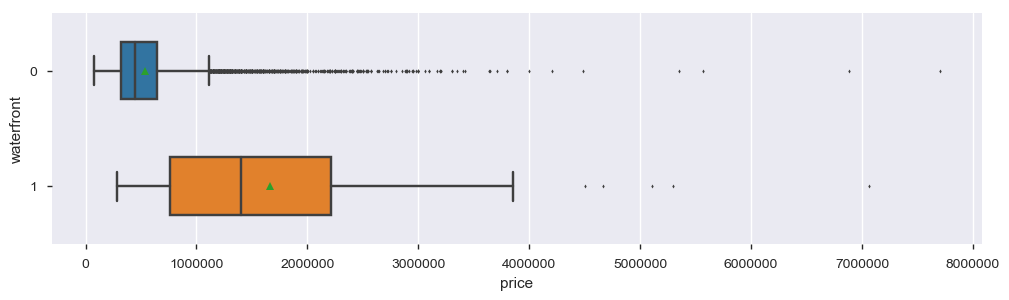

In [251]:
fig, ax = plt.subplots(figsize=(12,3))
sns.boxplot(y = 'waterfront', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [252]:
waterfront_d = h_data.groupby('waterfront')['price'].agg(['mean', 'min', 'max', 'count', 'std'])
waterfront_d.sort_values(by='mean')

mean       min        max  count           std
waterfront                                                        
0           5.331939e+05   78000.0  7700000.0  21253  3.416350e+05
1           1.661876e+06  285000.0  7062500.0    163  1.120372e+06

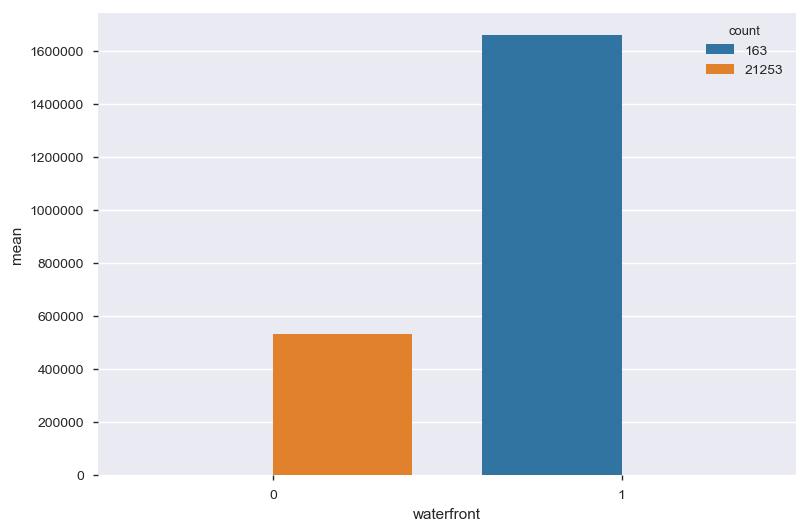

In [253]:
plt.figure(figsize=(9,6))
sns.barplot( waterfront_d.index, 'mean', 'count', data = waterfront_d)
plt.show()

In [254]:
r, p = stats.pointbiserialr(h_data['waterfront'], h_data['price'])
print ('point biserial correlation r between price and waterfront is %s with p = %s' %(r,p))

point biserial correlation r between price and waterfront is 0.2670361283599299 with p = 0.0


**Comments:**

The no waterfront box plot is comparatively short. This suggests that overall, house prices in this group are very close to each other.
The waterfront box plot is comparatively tall. This suggests that house prices differ greatly in this group.
There is obvious shape differences between the two distributions, suggesting a higher sell price, in general, for houses with a waterfront. This is validated by a positive value of the point-biserial correlation.
The correlation if however small (r<0.3). Note that we haven't test here the 3 main assumptions of the point-biserial correlation and can't rely too much on the result (1: There should be no significant outliers in the two groups of the dichotomous variable in terms of the continuous variable, 2: There should be homogeneity of variances, 3: The continuous variable should be approximately normally distributed for each group of the dichotomous variable).


**basement_present**

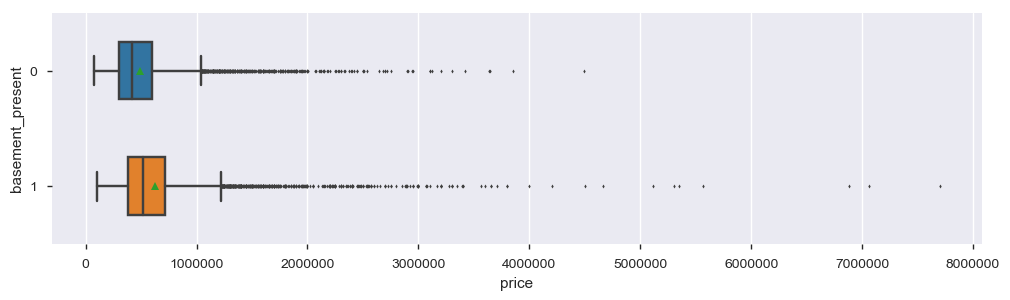

In [255]:
fig, ax = plt.subplots(figsize=(12,3))
sns.boxplot(y = 'basement_present', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [256]:
basement_present_d = h_data.groupby('basement_present')['price'].agg(['mean', 'min', 'max', 'count','std'])
basement_present_d.sort_values(by='mean')

mean       min        max  count            std
basement_present                                                          
0                 488522.576441   78000.0  4489000.0  12997  297399.633172
1                 624008.656016  100000.0  7700000.0   8419  442271.056554

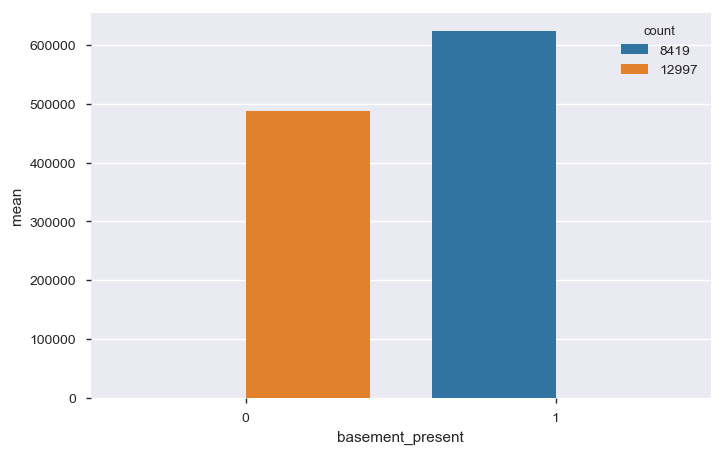

In [257]:
plt.figure(figsize=(8,5))
sns.barplot( basement_present_d.index, 'mean', 'count', data = basement_present_d)
plt.show()

In [258]:
r, p = stats.pointbiserialr(h_data['basement_present'], h_data['price'])
print ('point biserial correlation r between price and basement_present is %s with p = %s' %(r,p))

point biserial correlation r between price and basement_present is 0.18015277737832092 with p = 1.1520733012045065e-155


**renovated**

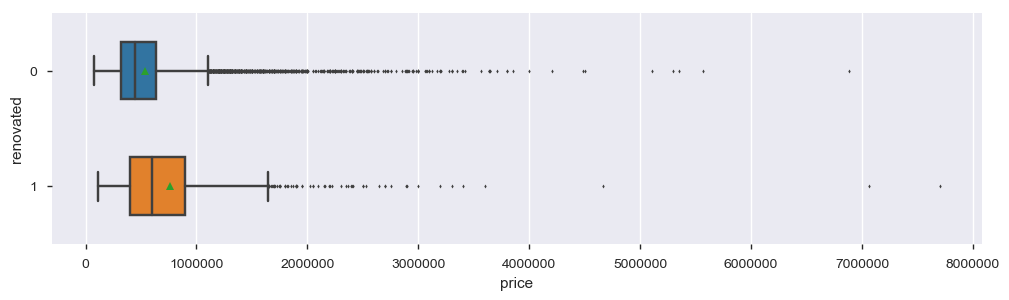

In [259]:
fig, ax = plt.subplots(figsize=(12,3))
sns.boxplot(y = 'renovated', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [260]:
renovated_d = h_data.groupby('renovated')['price'].agg(['mean', 'min', 'max', 'count','std'])
renovated_d.sort_values(by='mean')

mean       min        max  count            std
renovated                                                          
0          532006.698917   78000.0  6885000.0  20506  349674.571557
1          762118.058242  110000.0  7700000.0    910  608430.783572

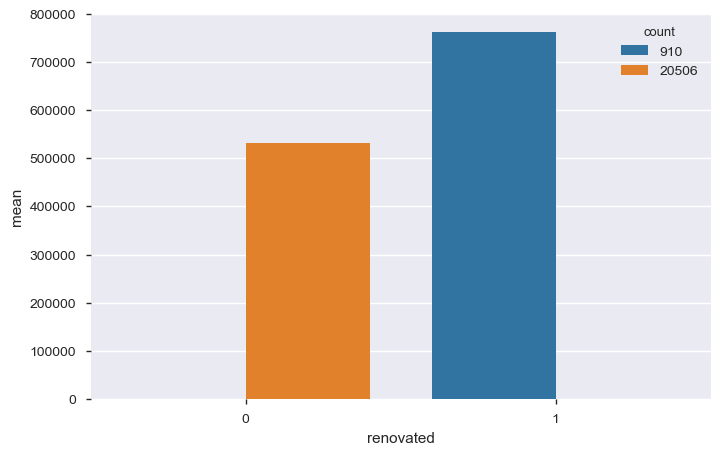

In [261]:
plt.figure(figsize=(8,5))
sns.barplot( renovated_d.index, 'mean', 'count', data = renovated_d)
plt.show()

In [262]:
r, p = stats.pointbiserialr(h_data['renovated'], h_data['price'])
print ('point biserial correlation r between price and renovated is %s with p = %s' %(r,p))

point biserial correlation r between price and renovated is 0.1263553694998668 with p = 6.229495743577385e-77


**floors**

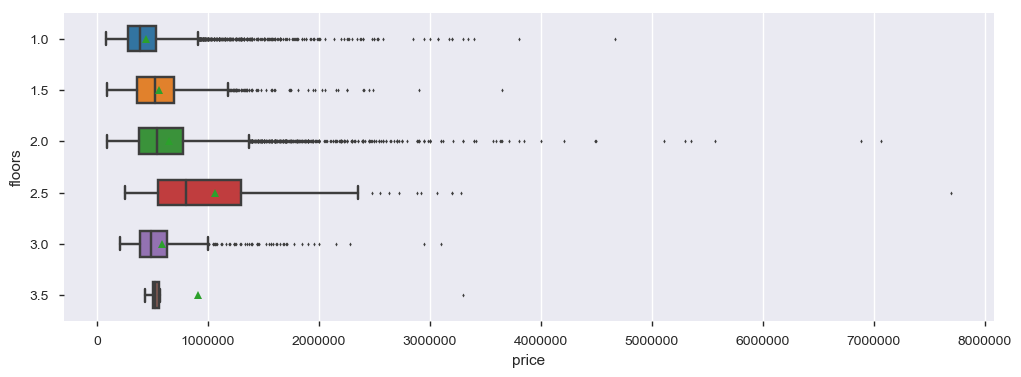

In [263]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'floors', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [264]:
floors_d = h_data.groupby('floors')['price'].agg(['mean', 'min', 'max', 'count', 'std'])
floors_d.sort_values(by='mean', ascending=False)

mean       min        max  count           std
floors                                                        
2.5     1.060346e+06  255000.0  7700000.0    161  8.582595e+05
3.5     9.102143e+05  435000.0  3300000.0      7  1.054669e+06
2.0     6.493944e+05   90000.0  7062500.0   8201  4.340375e+05
3.0     5.833486e+05  205000.0  3100000.0    608  3.392625e+05
1.5     5.619477e+05   92000.0  3650000.0   1888  3.034928e+05
1.0     4.439819e+05   78000.0  4668000.0  10551  2.639276e+05

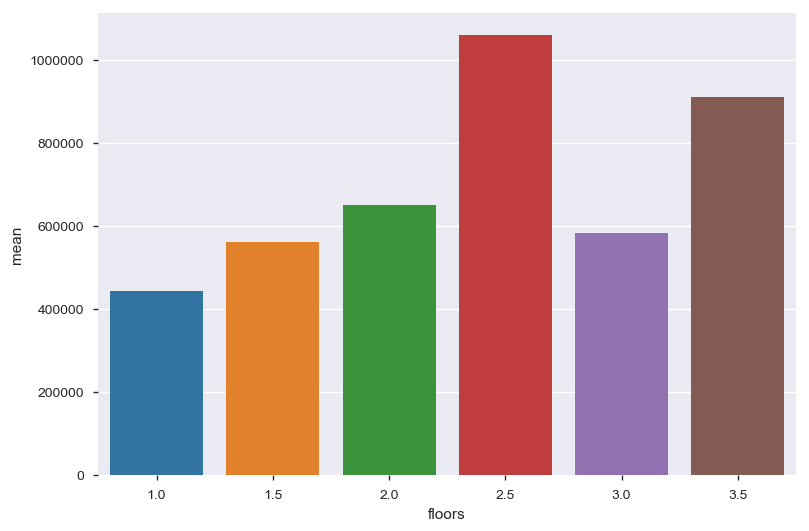

In [265]:
plt.figure(figsize=(9,6))
sns.barplot( floors_d.index, 'mean', data = floors_d)
plt.show()

In [266]:
r, p = stats.spearmanr(h_data['floors'], h_data['price'])
print ('spearman correlation r between price and floors is %s with p = %s' %(r,p))

spearman correlation r between price and floors is 0.3200774617711534 with p = 0.0


**view**

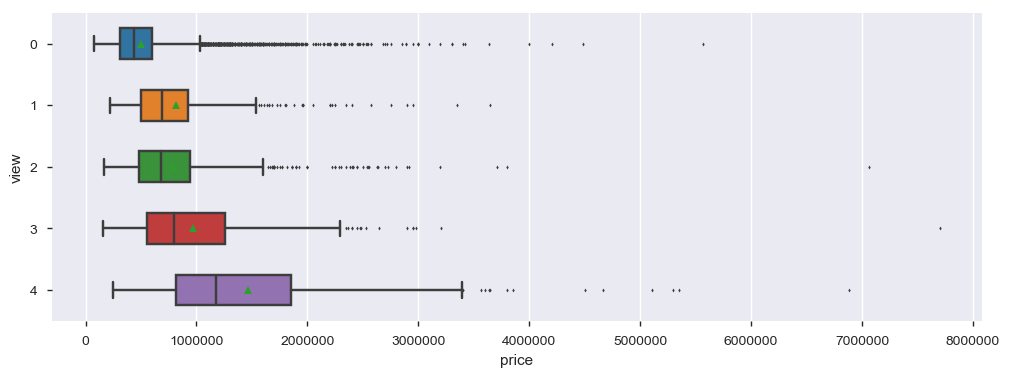

In [267]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'view', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [268]:
view_d = h_data.groupby('view')['price'].agg(['mean', 'min', 'max', 'count', 'std'])
view_d.sort_values(by='mean', ascending=False)

mean       min        max  count            std
view                                                         
4     1.465751e+06  252000.0  6885000.0    316  955755.394284
3     9.715104e+05  154000.0  7700000.0    507  613852.966176
1     8.132847e+05  217000.0  3650000.0    331  511395.259933
2     7.930803e+05  169317.0  7062500.0    960  510334.295352
0     4.982162e+05   78000.0  5570000.0  19302  287044.350500

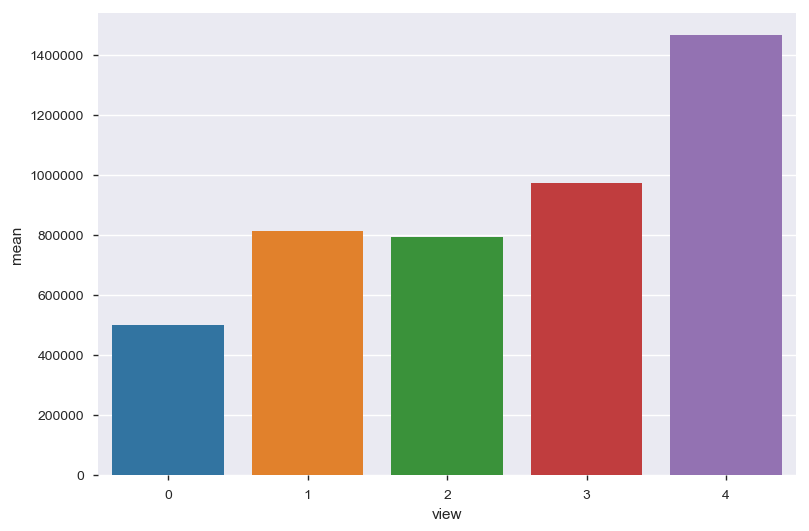

In [269]:
plt.figure(figsize=(9,6))
sns.barplot( view_d.index, 'mean', data = view_d)
plt.show()

In [270]:
r, p = stats.spearmanr(h_data['view'], h_data['price'])
print ('spearman correlation r between price and view is %s with p = %s' %(r,p))

spearman correlation r between price and view is 0.29339853810998745 with p = 0.0


**condition**

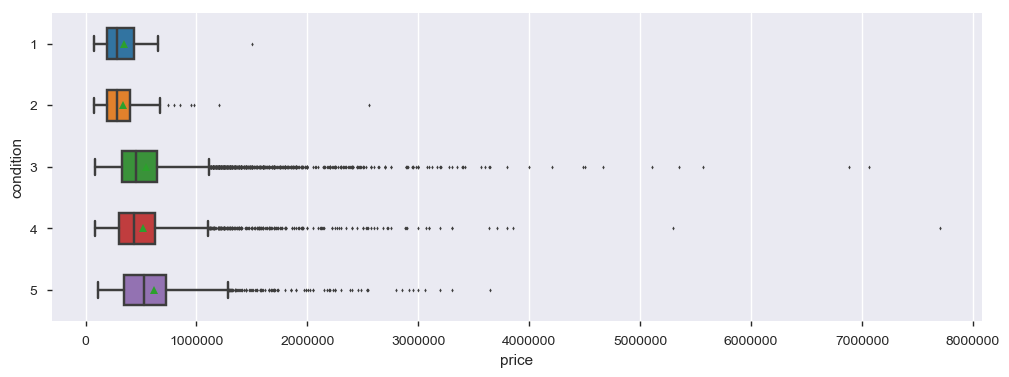

In [271]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'condition', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [272]:
condition_d = h_data.groupby('condition')['price'].agg(['mean', 'min', 'max', 'count','std'])
condition_d.sort_values(by='mean', ascending=False)

mean       min        max  count            std
condition                                                          
5          613111.545670  110000.0  3650000.0   1686  410884.734867
3          543889.168238   83000.0  7062500.0  13897  364928.789715
4          522210.459862   89000.0  7700000.0   5643  358171.886173
1          349480.357143   78000.0  1500000.0     28  274653.006112
2          333974.623457   80000.0  2555000.0    162  250749.326239

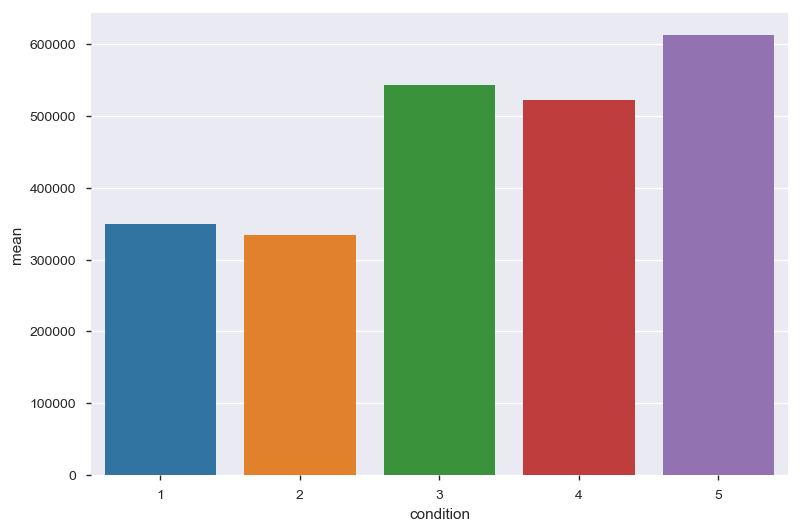

In [273]:
plt.figure(figsize=(9,6))
sns.barplot( condition_d.index, 'mean', data = condition_d)
plt.show()

In [274]:
r, p = stats.spearmanr(h_data['condition'], h_data['price'])
print ('spearman correlation r between price and condition is %s with p = %s' %(r,p))

spearman correlation r between price and condition is 0.01587481226583699 with p = 0.020170366203586323


**grade**

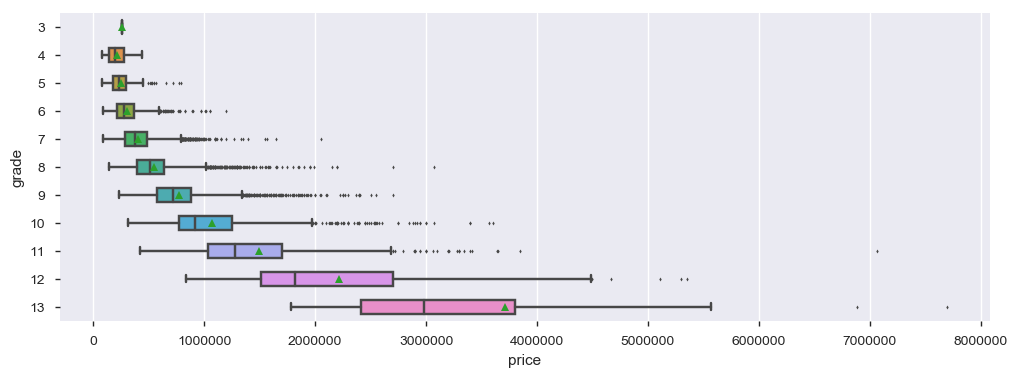

In [275]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'grade', x = 'price', data = h_data,width = 0.5,orient = 'h', showmeans = True, fliersize = 2)
plt.show()

In [276]:
grade_d = h_data.groupby('grade')['price'].agg(['mean', 'min', 'max', 'count', 'std'])
grade_d.sort_values(by='mean', ascending=False)

mean        min        max  count           std
grade                                                         
13     3.709615e+06  1780000.0  7700000.0     13  1.859450e+06
12     2.212521e+06   835000.0  5350000.0     88  1.029567e+06
11     1.498242e+06   420000.0  7062500.0    396  7.069597e+05
10     1.071612e+06   316000.0  3600000.0   1130  4.837897e+05
9      7.737110e+05   230000.0  2700000.0   2604  3.156917e+05
8      5.433722e+05   140000.0  3070000.0   6040  2.175589e+05
7      4.036257e+05    90000.0  2050000.0   8888  1.555405e+05
6      3.042484e+05    84000.0  1200000.0   1995  1.226688e+05
3      2.620000e+05   262000.0   262000.0      1           NaN
5      2.504543e+05    78000.0   795000.0    234  1.172046e+05
4      2.120019e+05    80000.0   435000.0     27  9.729450e+04

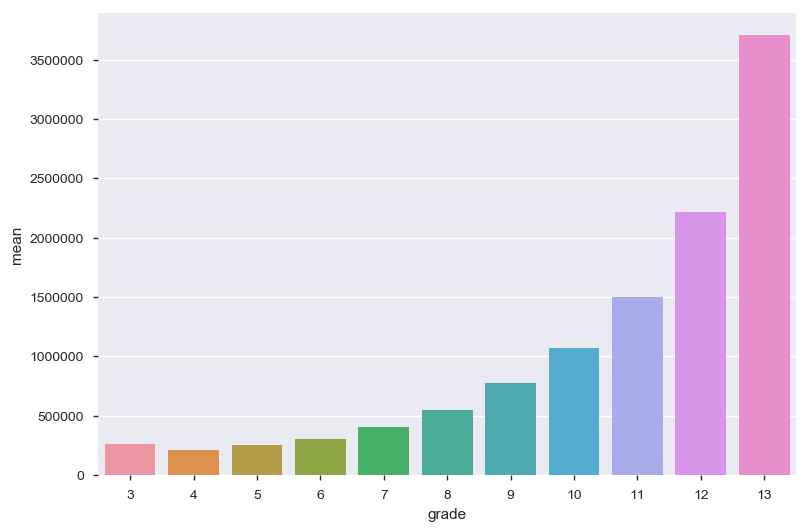

In [277]:
plt.figure(figsize=(9,6))
sns.barplot( grade_d.index, 'mean', data = grade_d)
plt.show()

In [278]:
r, p = stats.spearmanr(h_data['grade'], h_data['price'])
print ('spearman correlation r between price and grade is %s with p = %s' %(r,p))

spearman correlation r between price and grade is 0.6566311616384889 with p = 0.0


**zipcode**

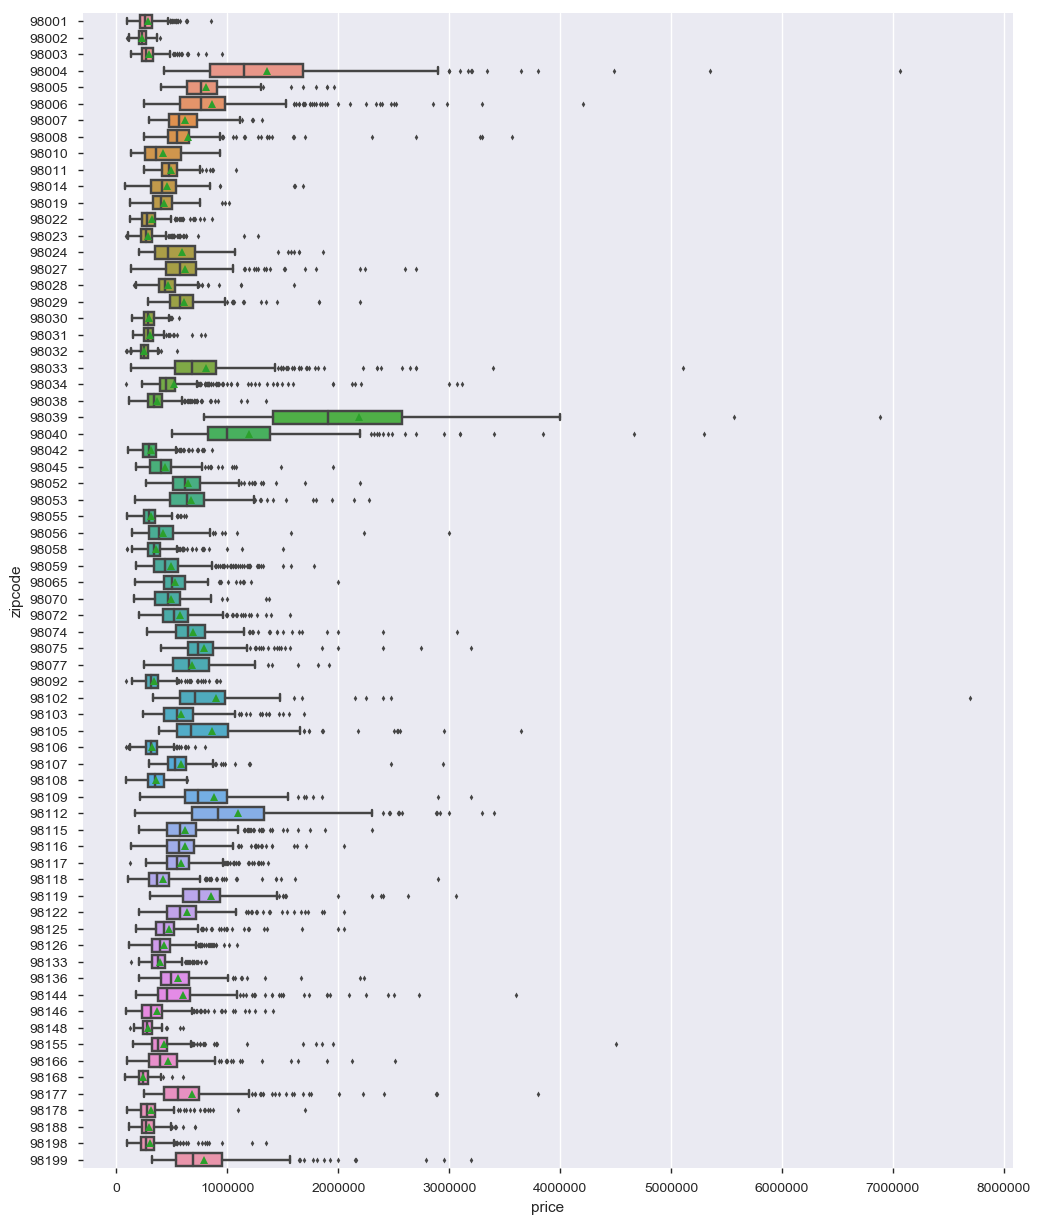

In [279]:
fig = plt.subplots(figsize=(12,15))
sns.boxplot(y = 'zipcode', x = 'price', data = h_data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3)

In [280]:
zipcode_d= h_data.groupby('zipcode')['price'].agg(['mean', 'min', 'max', 'count', 'std'])
zipcode_d_10 = zipcode_d.sort_values(by='mean',ascending=False).head(10)
print(type(zipcode_d_10))
zipcode_d_10

<class 'pandas.core.frame.DataFrame'>


mean       min        max  count           std
zipcode                                                        
98039    2.186843e+06  787500.0  6885000.0     49  1.163564e+06
98004    1.355387e+06  425000.0  7062500.0    315  7.472826e+05
98040    1.194230e+06  500000.0  5300000.0    282  6.074935e+05
98112    1.096192e+06  169317.0  3400000.0    268  5.947617e+05
98102    8.993954e+05  330000.0  7700000.0    104  7.902389e+05
98109    8.796236e+05  216650.0  3200000.0    109  4.552288e+05
98105    8.628252e+05  380000.0  3650000.0    229  4.772876e+05
98006    8.578753e+05  247500.0  4208000.0    490  4.455127e+05
98119    8.494480e+05  300523.0  3065000.0    184  4.337225e+05
98005    8.101649e+05  400000.0  1960000.0    168  2.687537e+05

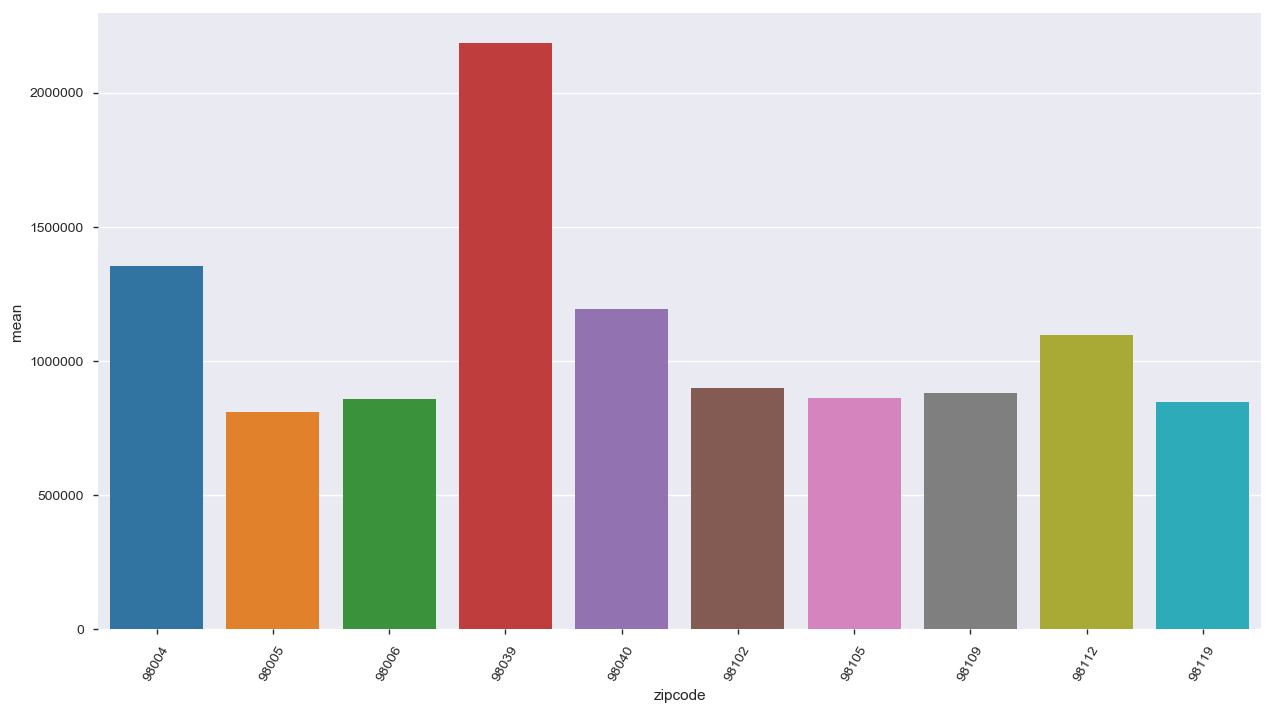

In [281]:
plt.figure(figsize=(15,8))
sns.barplot( zipcode_d_10.index, 'mean', data = zipcode_d_10)
plt.xticks(rotation=60)
plt.show()

### Inferential Statistics

In [282]:
# Create a copy of dataframe df to perform data wrangling 
new_df = h_data.copy()

**bedroom** and **price**

**Null Hypothesis:**  There is no significant correlation between number of bedroom and price.  
**Alternative Hypothesis:** There is a correlation between number of bedrooms and price.  
**Significance Level:** 95% Confidence

In [283]:
#function to calculate the pearson's r
def pearson_r(x,y):
    ''' Compute Pearson's correlation 
    coefficient between two arrays.'''
    #Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    #return entry[0,1]
    return corr_mat[0,1]

In [284]:

np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(new_df.bedrooms, new_df.price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute bedrooms measurments: bedrooms_permuted
    bedrooms_permuted = np.random.permutation(new_df.bedrooms)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(bedrooms_permuted, new_df.price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between number of bedrooms and price.

**bathroom** and **price**

**Null Hypothesis:**  There is no significant correlation between number of bathroom and price.  
**Alternative Hypothesis:** There is a correlation between number of bathroom and price.  
**Significance Level:** 95% Confidence

In [285]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(new_df.bathrooms, new_df.price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute bathrooms measurments: bathrooms_permuted
    bathrooms_permuted = np.random.permutation(new_df.bathrooms)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(bathrooms_permuted, new_df.price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between number of bathrooms and price.

**sqft_living** and **price**

**Null Hypothesis:** There is no significant correlation between number of sqft_living  and price.  
**Alternative Hypothesis:** There is a correlation between number of sqft_living  and price.  
**Significance Level:** 95% Confidence

In [286]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(new_df.sqft_living, new_df.price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute sqft_living measurments: sqft_living_permuted
    sqft_living_permuted = np.random.permutation(new_df.sqft_living)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(sqft_living_permuted, new_df.price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0.0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between sqft_living and price.

**sqft_above** and **price**

**Null Hypothesis:** There is no significant correlation between number of sqft_above  and price.  
**Alternative Hypothesis:** There is a correlation between number of sqft_above  and price.  
**Significance Level:** 95% Confidence

In [287]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(new_df.sqft_above, new_df.price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute sqft_above measurments: sqft_above_permuted
    sqft_above_permuted = np.random.permutation(new_df.sqft_above)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(sqft_above_permuted, new_df.price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0.0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between sqft_above and price.

## Machine Learning

In [288]:
categorial_cols1 = ['waterfront', 'floors', 'view', 'condition', 'grade', 'basement_present', 'renovated']

for cc in categorial_cols1:
    dummies = pd.get_dummies(h_data[cc], drop_first=True)
    dummies = dummies.add_prefix("{}".format(cc))
    h_data.drop(cc, axis=1, inplace=True)
    h_data = h_data.join(dummies)

In [289]:
h_data_copy = h_data.copy() 

In [290]:
dummies_zipcodes = pd.get_dummies(h_data['zipcode'], drop_first=False)
dummies_zipcodes.reset_index(inplace=True)
dummies_zipcodes = dummies_zipcodes.add_prefix("{}_".format('zipcode'))
dummies_zipcodes = dummies_zipcodes[['zipcode_98004','zipcode_98102','zipcode_98109','zipcode_98112','zipcode_98039','zipcode_98040']]
h_data.drop('zipcode', axis=1, inplace=True)
h_data = h_data.join(dummies_zipcodes)

In [291]:
pandas_profiling.ProfileReport(h_data)

In [292]:
pandas_profiling.ProfileReport(h_data_copy)

In [293]:
"""pfr = pandas_profiling.ProfileReport(h_data)
pfr.to_file("D:\GENEL\SPRINGBOARD\PROJECTS\CAPSTONE PROJECTS\CAPSTONE PROJECT-1\h_data_overview.html")"""

'pfr = pandas_profiling.ProfileReport(h_data)\npfr.to_file("D:\\GENEL\\SPRINGBOARD\\PROJECTS\\CAPSTONE PROJECTS\\CAPSTONE PROJECT-1\\h_data_overview.html")'

In [294]:
"""#X is the features/data we use for our model (input data)
X = h_data.drop(['price', 'zipcode','yr_built', 'yr_renovated', 'sqft_basement' ],axis=1)
#y is the target of our data
y = h_data['price']"""

"#X is the features/data we use for our model (input data)\nX = h_data.drop(['price', 'zipcode','yr_built', 'yr_renovated', 'sqft_basement' ],axis=1)\n#y is the target of our data\ny = h_data['price']"

In [295]:
#X is the features/data we use for our model (input data)
X = h_data.drop(['price', 'yr_renovated'],axis=1)
X_copy = h_data_copy.drop(['price', 'yr_renovated'],axis=1)

#y is the target of our data
y = h_data['price']
y_copy = h_data_copy['price']

In [296]:
#Preparing a dataframe for model analysis
#Data frame for evaluation metrics
evaluation_matrix = pd.DataFrame(index=['Mean_Squared_Error(MSE)', 'Root_Mean_Squared_Error(RMSE)', 'R2_score', 'Mean_Absolute_Error(MAE)'], columns=['LinearReg','Ridge','Lasso', 'SVR', 'SVR_L','DecisionTree', 'DecisionTree_copy', 'RandomForest','RandomForest_copy'])

## Linear Regression

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [298]:
# create traing and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# import the model
from sklearn.linear_model import LinearRegression
# 1. Set up the model
lr = LinearRegression()

# 2. Use fit and predict
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [299]:
MSE = mean_squared_error(y_test, lr_predict)
RMSE = np.sqrt(MSE)
R2_score = r2_score(y_test, lr_predict)
MAE = mean_absolute_error(y_test, lr_predict)

In [300]:
#entering metrics score to the metics dataframe
evaluation_matrix.loc['Mean_Squared_Error(MSE)','LinearReg'] = MSE
evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)','LinearReg'] = RMSE
evaluation_matrix.loc['R2_score','LinearReg'] = R2_score
evaluation_matrix.loc['Mean_Absolute_Error(MAE)','LinearReg'] = MAE

In [301]:
evaluation_matrix

LinearReg Ridge Lasso  SVR SVR_L  \
Mean_Squared_Error(MSE)        3.37764e+10   NaN   NaN  NaN   NaN   
Root_Mean_Squared_Error(RMSE)       183784   NaN   NaN  NaN   NaN   
R2_score                          0.751971   NaN   NaN  NaN   NaN   
Mean_Absolute_Error(MAE)            125387   NaN   NaN  NaN   NaN   

                              DecisionTree DecisionTree_copy RandomForest  \
Mean_Squared_Error(MSE)                NaN               NaN          NaN   
Root_Mean_Squared_Error(RMSE)          NaN               NaN          NaN   
R2_score                               NaN               NaN          NaN   
Mean_Absolute_Error(MAE)               NaN               NaN          NaN   

                              RandomForest_copy  
Mean_Squared_Error(MSE)                     NaN  
Root_Mean_Squared_Error(RMSE)               NaN  
R2_score                                    NaN  
Mean_Absolute_Error(MAE)                    NaN

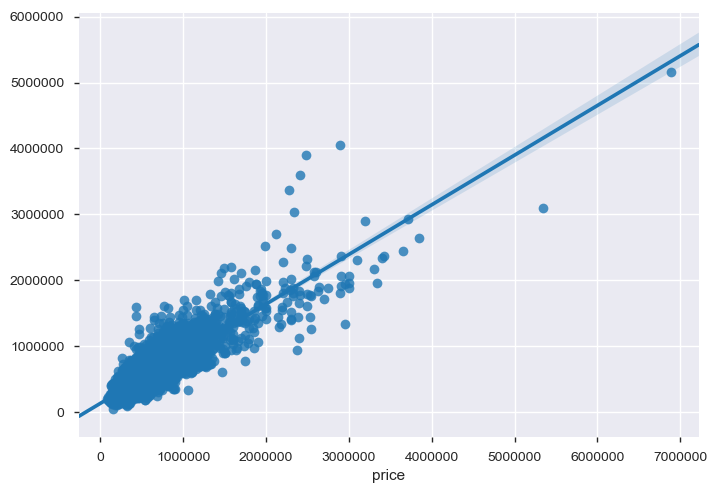

In [302]:
sns.regplot(y_test, lr_predict)

In [303]:
from sklearn.model_selection import cross_val_score
cv_results_lr = cross_val_score(lr, X, y, cv=5)
print(cv_results_lr)
np.mean(cv_results_lr)

[0.7451403  0.75423457 0.74824607 0.7583373  0.74244934]


0.7496815163383299

## Ridge Regression

In [304]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [306]:
MSE_R = mean_squared_error(y_test, ridge_pred)
RMSE_R = np.sqrt(MSE_R)
R2_score_R = r2_score(y_test, ridge_pred)
MAE_R = mean_absolute_error(y_test, ridge_pred)

In [307]:
evaluation_matrix.loc['Mean_Squared_Error(MSE)','Ridge'] = MSE_R
evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)','Ridge'] = RMSE_R
evaluation_matrix.loc['R2_score','Ridge'] = R2_score_R
evaluation_matrix.loc['Mean_Absolute_Error(MAE)','Ridge'] = MAE_R

In [308]:
evaluation_matrix

LinearReg       Ridge Lasso  SVR SVR_L  \
Mean_Squared_Error(MSE)        3.37764e+10  3.3788e+10   NaN  NaN   NaN   
Root_Mean_Squared_Error(RMSE)       183784      183815   NaN  NaN   NaN   
R2_score                          0.751971    0.751886   NaN  NaN   NaN   
Mean_Absolute_Error(MAE)            125387      125394   NaN  NaN   NaN   

                              DecisionTree DecisionTree_copy RandomForest  \
Mean_Squared_Error(MSE)                NaN               NaN          NaN   
Root_Mean_Squared_Error(RMSE)          NaN               NaN          NaN   
R2_score                               NaN               NaN          NaN   
Mean_Absolute_Error(MAE)               NaN               NaN          NaN   

                              RandomForest_copy  
Mean_Squared_Error(MSE)                     NaN  
Root_Mean_Squared_Error(RMSE)               NaN  
R2_score                                    NaN  
Mean_Absolute_Error(MAE)                    NaN

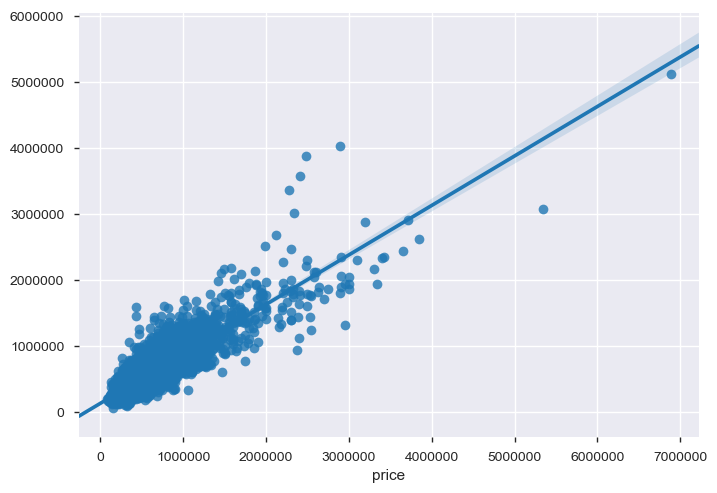

In [309]:
sns.regplot(y_test, ridge_pred)

In [310]:
#Cross validation
cv_results_ridge = cross_val_score(ridge, X, y, cv=5)
print(cv_results_ridge)
np.mean(cv_results_ridge)

[0.74500906 0.75407486 0.74824397 0.75907398 0.74258523]


0.7497974203520112

## Lasso Regression

In [311]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
alphas = np.array([0.1,1,0.01,0.001,0.0001])
lasso = Lasso(alpha=1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

In [312]:
MSE_L = mean_squared_error(y_test, lasso_pred)
RMSE_L = np.sqrt(MSE_L)
R2_score_L = r2_score(y_test, lasso_pred)
MAE_L = mean_absolute_error(y_test, lasso_pred)

In [313]:
evaluation_matrix.loc['Mean_Squared_Error(MSE)','Lasso'] = MSE_L
evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)','Lasso'] = RMSE_L
evaluation_matrix.loc['R2_score','Lasso'] = R2_score_L
evaluation_matrix.loc['Mean_Absolute_Error(MAE)','Lasso'] = MAE_L

In [314]:
evaluation_matrix

LinearReg       Ridge        Lasso  SVR  \
Mean_Squared_Error(MSE)        3.37764e+10  3.3788e+10  3.37866e+10  NaN   
Root_Mean_Squared_Error(RMSE)       183784      183815       183811  NaN   
R2_score                          0.751971    0.751886     0.751895  NaN   
Mean_Absolute_Error(MAE)            125387      125394       125416  NaN   

                              SVR_L DecisionTree DecisionTree_copy  \
Mean_Squared_Error(MSE)         NaN          NaN               NaN   
Root_Mean_Squared_Error(RMSE)   NaN          NaN               NaN   
R2_score                        NaN          NaN               NaN   
Mean_Absolute_Error(MAE)        NaN          NaN               NaN   

                              RandomForest RandomForest_copy  
Mean_Squared_Error(MSE)                NaN               NaN  
Root_Mean_Squared_Error(RMSE)          NaN               NaN  
R2_score                               NaN               NaN  
Mean_Absolute_Error(MAE)               NaN               NaN

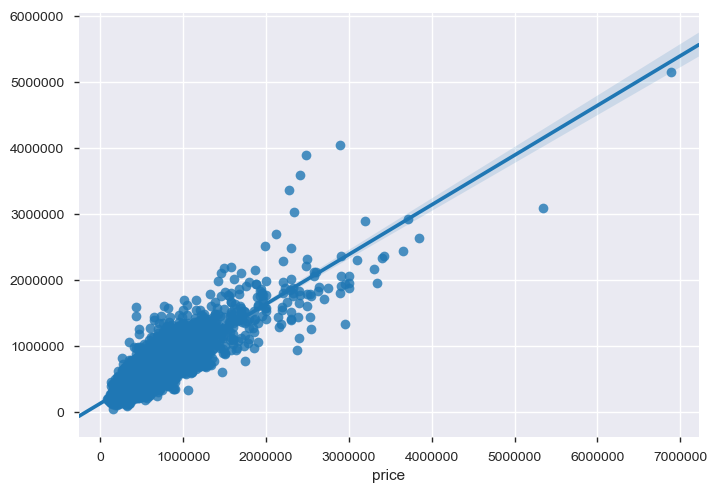

In [315]:
sns.regplot(y_test, lasso_pred)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


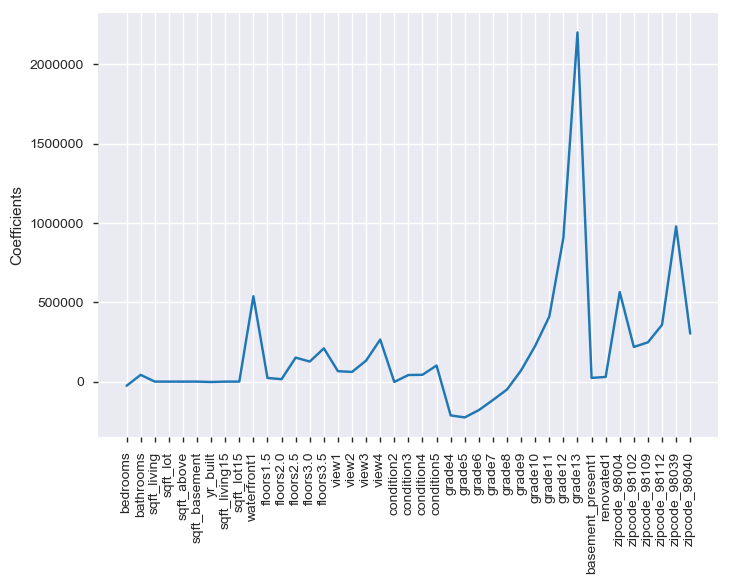

In [316]:
names = X.columns
lasso = Lasso(alpha=1)
lasso_coef = lasso.fit(X_train, y_train).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show()

In [317]:
cv_results_lasso = cross_val_score(lasso, X, y, cv=5)
print(cv_results_lasso)
np.mean(cv_results_lasso)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

[0.74543605 0.75421456 0.74823914 0.75834726 0.74245362]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.7497381231532132

## SVR

In [318]:
from sklearn.svm import SVR

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [320]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)

In [321]:
y_train = y_train.values.reshape(-1,1)

In [322]:
y_train_scaled = scale.fit_transform(y_train)

In [323]:
X_test_scaled = scale.fit_transform(X_test)
y_test = y_test.values.reshape(-1,1)
y_test_scaled = scale.fit_transform(y_test)

In [324]:
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X_train_scaled, y_train_scaled.ravel())
SVR_pred = svr_reg.predict(X_test_scaled)

In [325]:
MSE_SVR = mean_squared_error(y_test_scaled, SVR_pred)
RMSE_SVR = np.sqrt(MSE_SVR)
R2_score_SVR = r2_score(y_test_scaled, SVR_pred)
MAE_SVR = mean_absolute_error(y_test_scaled, SVR_pred)

In [326]:
evaluation_matrix.loc['Mean_Squared_Error(MSE)','SVR'] = MSE_SVR
evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)','SVR'] = RMSE_SVR
evaluation_matrix.loc['R2_score','SVR'] = R2_score_SVR
evaluation_matrix.loc['Mean_Absolute_Error(MAE)','SVR'] = MAE_SVR

In [327]:
evaluation_matrix

LinearReg       Ridge        Lasso       SVR  \
Mean_Squared_Error(MSE)        3.37764e+10  3.3788e+10  3.37866e+10  0.326739   
Root_Mean_Squared_Error(RMSE)       183784      183815       183811  0.571611   
R2_score                          0.751971    0.751886     0.751895  0.673261   
Mean_Absolute_Error(MAE)            125387      125394       125416  0.328629   

                              SVR_L DecisionTree DecisionTree_copy  \
Mean_Squared_Error(MSE)         NaN          NaN               NaN   
Root_Mean_Squared_Error(RMSE)   NaN          NaN               NaN   
R2_score                        NaN          NaN               NaN   
Mean_Absolute_Error(MAE)        NaN          NaN               NaN   

                              RandomForest RandomForest_copy  
Mean_Squared_Error(MSE)                NaN               NaN  
Root_Mean_Squared_Error(RMSE)          NaN               NaN  
R2_score                               NaN               NaN  
Mean_Absolute_Error(MAE)               NaN               NaN

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [329]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)

In [330]:
y_train = y_train.values.reshape(-1,1)

In [331]:
y_train_scaled = scale.fit_transform(y_train)

In [332]:
X_test_scaled = scale.fit_transform(X_test)
y_test = y_test.values.reshape(-1,1)
y_test_scaled = scale.fit_transform(y_test)

In [333]:
# Trying kernel = linear
svr_reg_l = SVR(kernel = 'linear')
svr_reg_l.fit(X_train_scaled, y_train_scaled.ravel())
SVR_pred = svr_reg_l.predict(X_test_scaled)

In [334]:
MSE_SVR_L = mean_squared_error(y_test_scaled, SVR_pred)
RMSE_SVR_L = np.sqrt(MSE_SVR_L)
R2_score_SVR_L = r2_score(y_test_scaled, SVR_pred)
MAE_SVR_L = mean_absolute_error(y_test_scaled, SVR_pred)

In [335]:
evaluation_matrix.loc['Mean_Squared_Error(MSE)','SVR_L'] = MSE_SVR_L
evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)','SVR_L'] = RMSE_SVR_L
evaluation_matrix.loc['R2_score','SVR_L'] = R2_score_SVR_L
evaluation_matrix.loc['Mean_Absolute_Error(MAE)','SVR_L'] = MAE_SVR_L

In [336]:
evaluation_matrix

LinearReg       Ridge        Lasso       SVR  \
Mean_Squared_Error(MSE)        3.37764e+10  3.3788e+10  3.37866e+10  0.326739   
Root_Mean_Squared_Error(RMSE)       183784      183815       183811  0.571611   
R2_score                          0.751971    0.751886     0.751895  0.673261   
Mean_Absolute_Error(MAE)            125387      125394       125416  0.328629   

                                  SVR_L DecisionTree DecisionTree_copy  \
Mean_Squared_Error(MSE)        0.253243          NaN               NaN   
Root_Mean_Squared_Error(RMSE)  0.503232          NaN               NaN   
R2_score                       0.746757          NaN               NaN   
Mean_Absolute_Error(MAE)       0.332053          NaN               NaN   

                              RandomForest RandomForest_copy  
Mean_Squared_Error(MSE)                NaN               NaN  
Root_Mean_Squared_Error(RMSE)          NaN               NaN  
R2_score                               NaN               NaN  
Mean_Absolute_Error(MAE)               NaN               NaN

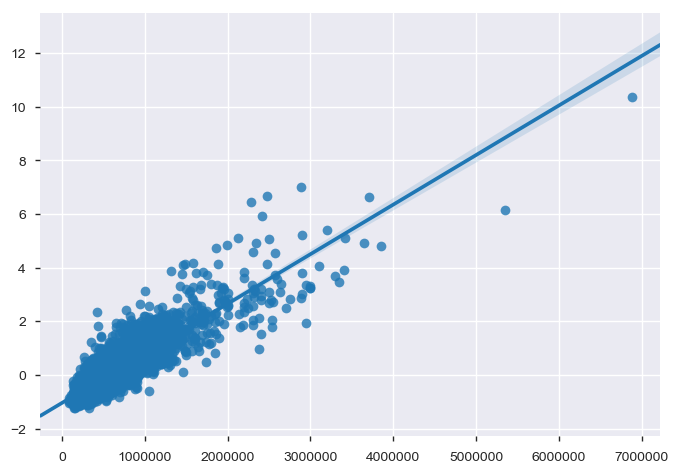

In [337]:
sns.regplot(y_test, SVR_pred)

## Decision Tree

In [338]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

In [339]:
MSE_DT = mean_squared_error(y_test, DT_pred)
RMSE_DT = np.sqrt(MSE_DT)
R2_score_DT = r2_score(y_test, DT_pred)
MAE_DT = mean_absolute_error(y_test, DT_pred)

In [340]:
evaluation_matrix.loc['Mean_Squared_Error(MSE)','DecisionTree'] = MSE_DT
evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)','DecisionTree'] = RMSE_DT
evaluation_matrix.loc['R2_score','DecisionTree'] = R2_score_DT
evaluation_matrix.loc['Mean_Absolute_Error(MAE)','DecisionTree'] = MAE_DT

In [341]:
evaluation_matrix

LinearReg       Ridge        Lasso       SVR  \
Mean_Squared_Error(MSE)        3.37764e+10  3.3788e+10  3.37866e+10  0.326739   
Root_Mean_Squared_Error(RMSE)       183784      183815       183811  0.571611   
R2_score                          0.751971    0.751886     0.751895  0.673261   
Mean_Absolute_Error(MAE)            125387      125394       125416  0.328629   

                                  SVR_L DecisionTree DecisionTree_copy  \
Mean_Squared_Error(MSE)        0.253243  5.89478e+10               NaN   
Root_Mean_Squared_Error(RMSE)  0.503232       242792               NaN   
R2_score                       0.746757      0.56713               NaN   
Mean_Absolute_Error(MAE)       0.332053       150482               NaN   

                              RandomForest RandomForest_copy  
Mean_Squared_Error(MSE)                NaN               NaN  
Root_Mean_Squared_Error(RMSE)          NaN               NaN  
R2_score                               NaN               NaN  
Mean_Absolute_Error(MAE)               NaN               NaN

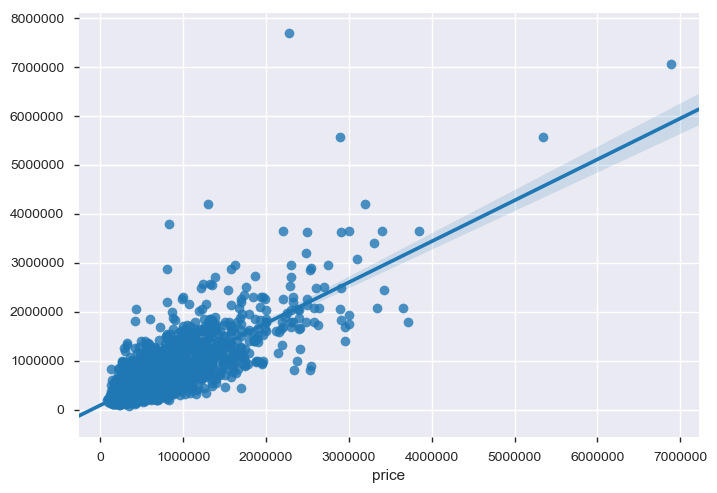

In [342]:
sns.regplot(y_test, DT_pred)

In [343]:
cv_results_DT = cross_val_score(DT, X, y, cv=5)
print(cv_results_DT)
np.mean(cv_results_DT)

[0.65091567 0.56217359 0.58738499 0.59058018 0.58975913]


0.5961627117740784

In [344]:
#Trying with h_data_copy dataset(X_copy, y_copy)
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size = 0.3, random_state=42)
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

In [345]:
MSE_DT_copy = mean_squared_error(y_test, DT_pred)
RMSE_DT_copy = np.sqrt(MSE_DT_copy)
R2_score_DT_copy = r2_score(y_test, DT_pred)
MAE_DT_copy = mean_absolute_error(y_test, DT_pred)

In [346]:
evaluation_matrix.loc['Mean_Squared_Error(MSE)','DecisionTree_copy'] = MSE_DT_copy
evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)','DecisionTree_copy'] = RMSE_DT_copy
evaluation_matrix.loc['R2_score','DecisionTree_copy'] = R2_score_DT_copy
evaluation_matrix.loc['Mean_Absolute_Error(MAE)','DecisionTree_copy'] = MAE_DT_copy

In [347]:
evaluation_matrix

LinearReg       Ridge        Lasso       SVR  \
Mean_Squared_Error(MSE)        3.37764e+10  3.3788e+10  3.37866e+10  0.326739   
Root_Mean_Squared_Error(RMSE)       183784      183815       183811  0.571611   
R2_score                          0.751971    0.751886     0.751895  0.673261   
Mean_Absolute_Error(MAE)            125387      125394       125416  0.328629   

                                  SVR_L DecisionTree DecisionTree_copy  \
Mean_Squared_Error(MSE)        0.253243  5.89478e+10       5.80211e+10   
Root_Mean_Squared_Error(RMSE)  0.503232       242792            240876   
R2_score                       0.746757      0.56713          0.573935   
Mean_Absolute_Error(MAE)       0.332053       150482            127169   

                              RandomForest RandomForest_copy  
Mean_Squared_Error(MSE)                NaN               NaN  
Root_Mean_Squared_Error(RMSE)          NaN               NaN  
R2_score                               NaN               NaN  
Mean_Absolute_Error(MAE)               NaN               NaN

In [348]:
cv_results_DT = cross_val_score(DT, X_copy, y, cv=5)
print(cv_results_DT)
np.mean(cv_results_DT)

[0.63982403 0.62531078 0.6046206  0.63131542 0.60437304]


0.6210887733836059

## Random Forest

In [349]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
RF = RandomForestRegressor(n_estimators = 100)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

In [350]:
MSE_RF = mean_squared_error(y_test, RF_pred)
RMSE_RF = np.sqrt(MSE_RF)
R2_score_RF = r2_score(y_test, RF_pred)
MAE_RF = mean_absolute_error(y_test, RF_pred)

In [351]:
evaluation_matrix.loc['Mean_Squared_Error(MSE)','RandomForest'] = MSE_RF
evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)','RandomForest'] = RMSE_RF
evaluation_matrix.loc['R2_score','RandomForest'] = R2_score_RF
evaluation_matrix.loc['Mean_Absolute_Error(MAE)','RandomForest'] = MAE_RF

In [352]:
evaluation_matrix

LinearReg       Ridge        Lasso       SVR  \
Mean_Squared_Error(MSE)        3.37764e+10  3.3788e+10  3.37866e+10  0.326739   
Root_Mean_Squared_Error(RMSE)       183784      183815       183811  0.571611   
R2_score                          0.751971    0.751886     0.751895  0.673261   
Mean_Absolute_Error(MAE)            125387      125394       125416  0.328629   

                                  SVR_L DecisionTree DecisionTree_copy  \
Mean_Squared_Error(MSE)        0.253243  5.89478e+10       5.80211e+10   
Root_Mean_Squared_Error(RMSE)  0.503232       242792            240876   
R2_score                       0.746757      0.56713          0.573935   
Mean_Absolute_Error(MAE)       0.332053       150482            127169   

                              RandomForest RandomForest_copy  
Mean_Squared_Error(MSE)        2.79853e+10               NaN  
Root_Mean_Squared_Error(RMSE)       167288               NaN  
R2_score                          0.794496               NaN  
Mean_Absolute_Error(MAE)            109315               NaN

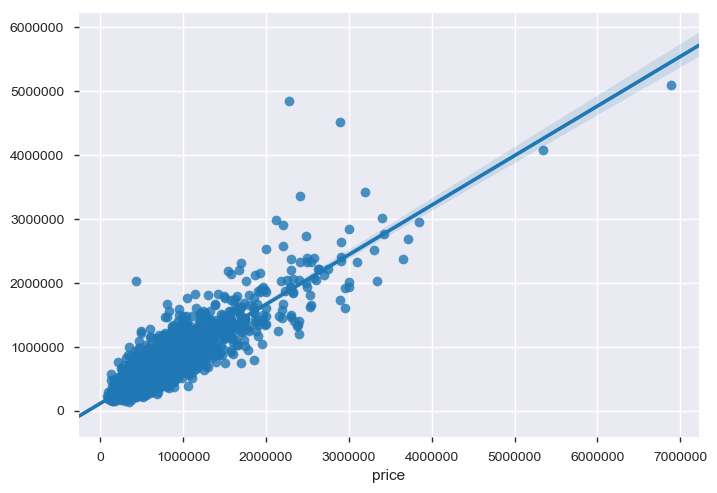

In [353]:
sns.regplot(y_test, RF_pred)

In [354]:
cv_results_RF = cross_val_score(RF, X, y, cv=5)
print(cv_results_RF)
np.mean(cv_results_RF)

[0.79506696 0.79565515 0.77766077 0.77732864 0.77379966]


0.7839022351146209

In [355]:
#Trying with h_data_copy dataframe (X_copy, y_copy)
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size = 0.3, random_state=42)
RF = RandomForestRegressor(n_estimators = 400)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

In [356]:
MSE_RF_copy = mean_squared_error(y_test, RF_pred)
RMSE_RF_copy = np.sqrt(MSE_RF_copy)
R2_score_RF_copy = r2_score(y_test, RF_pred)
MAE_RF_copy = mean_absolute_error(y_test, RF_pred)

In [357]:
evaluation_matrix.loc['Mean_Squared_Error(MSE)','RandomForest_copy'] = MSE_RF_copy
evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)','RandomForest_copy'] = RMSE_RF_copy
evaluation_matrix.loc['R2_score','RandomForest_copy'] = R2_score_RF_copy
evaluation_matrix.loc['Mean_Absolute_Error(MAE)','RandomForest_copy'] = MAE_RF_copy

In [358]:
evaluation_matrix

LinearReg       Ridge        Lasso       SVR  \
Mean_Squared_Error(MSE)        3.37764e+10  3.3788e+10  3.37866e+10  0.326739   
Root_Mean_Squared_Error(RMSE)       183784      183815       183811  0.571611   
R2_score                          0.751971    0.751886     0.751895  0.673261   
Mean_Absolute_Error(MAE)            125387      125394       125416  0.328629   

                                  SVR_L DecisionTree DecisionTree_copy  \
Mean_Squared_Error(MSE)        0.253243  5.89478e+10       5.80211e+10   
Root_Mean_Squared_Error(RMSE)  0.503232       242792            240876   
R2_score                       0.746757      0.56713          0.573935   
Mean_Absolute_Error(MAE)       0.332053       150482            127169   

                              RandomForest RandomForest_copy  
Mean_Squared_Error(MSE)        2.79853e+10       2.44322e+10  
Root_Mean_Squared_Error(RMSE)       167288            156308  
R2_score                          0.794496          0.820588  
Mean_Absolute_Error(MAE)            109315           88127.2

## GradientBoostingRegressor

In [359]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
# 1. Set up the model
gbr = GradientBoostingRegressor(n_estimators=300)
# 2. Use fit
gbr.fit(X_train, y_train)
gbr_predict = gbr.predict(X_test)

In [360]:
MSE_GBR = mean_squared_error(y_test, gbr_predict)
RMSE_GBR = np.sqrt(MSE_GBR)
R2_score_GBR = r2_score(y_test, gbr_predict)
MAE_GBR = mean_absolute_error(y_test, gbr_predict)

In [361]:
evaluation_matrix.loc['Mean_Squared_Error(MSE)','GradientBoosting'] = MSE_GBR
evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)','GradientBoosting'] = RMSE_GBR
evaluation_matrix.loc['R2_score','GradientBoosting'] = R2_score_GBR
evaluation_matrix.loc['Mean_Absolute_Error(MAE)','GradientBoosting'] = MAE_GBR

In [362]:
print(evaluation_matrix)

                                 LinearReg       Ridge        Lasso       SVR  \
Mean_Squared_Error(MSE)        3.37764e+10  3.3788e+10  3.37866e+10  0.326739   
Root_Mean_Squared_Error(RMSE)       183784      183815       183811  0.571611   
R2_score                          0.751971    0.751886     0.751895  0.673261   
Mean_Absolute_Error(MAE)            125387      125394       125416  0.328629   

                                  SVR_L DecisionTree DecisionTree_copy  \
Mean_Squared_Error(MSE)        0.253243  5.89478e+10       5.80211e+10   
Root_Mean_Squared_Error(RMSE)  0.503232       242792            240876   
R2_score                       0.746757      0.56713          0.573935   
Mean_Absolute_Error(MAE)       0.332053       150482            127169   

                              RandomForest RandomForest_copy  GradientBoosting  
Mean_Squared_Error(MSE)        2.79853e+10       2.44322e+10      2.602865e+10  
Root_Mean_Squared_Error(RMSE)       167288            156308 

In [363]:
#Trying with h_data_copy dataframe (X_copy, y_copy)
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size = 0.3, random_state=42)
# 1. Set up the model
gbr = GradientBoostingRegressor(n_estimators=300)
# 2. Use fit
gbr.fit(X_train, y_train)
gbr_predict = gbr.predict(X_test)

In [364]:
MSE_GBR_copy = mean_squared_error(y_test, gbr_predict)
RMSE_GBR_copy = np.sqrt(MSE_GBR_copy)
R2_score_GBR_copy = r2_score(y_test, gbr_predict)
MAE_GBR_copy = mean_absolute_error(y_test, gbr_predict)

In [365]:
evaluation_matrix.loc['Mean_Squared_Error(MSE)','GradientBoosting_copy'] = MSE_GBR_copy
evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)','GradientBoosting_copy'] = RMSE_GBR_copy
evaluation_matrix.loc['R2_score','GradientBoosting_copy'] = R2_score_GBR_copy
evaluation_matrix.loc['Mean_Absolute_Error(MAE)','GradientBoosting_copy'] = MAE_GBR_copy

In [366]:
evaluation_matrix

LinearReg       Ridge        Lasso       SVR  \
Mean_Squared_Error(MSE)        3.37764e+10  3.3788e+10  3.37866e+10  0.326739   
Root_Mean_Squared_Error(RMSE)       183784      183815       183811  0.571611   
R2_score                          0.751971    0.751886     0.751895  0.673261   
Mean_Absolute_Error(MAE)            125387      125394       125416  0.328629   

                                  SVR_L DecisionTree DecisionTree_copy  \
Mean_Squared_Error(MSE)        0.253243  5.89478e+10       5.80211e+10   
Root_Mean_Squared_Error(RMSE)  0.503232       242792            240876   
R2_score                       0.746757      0.56713          0.573935   
Mean_Absolute_Error(MAE)       0.332053       150482            127169   

                              RandomForest RandomForest_copy  \
Mean_Squared_Error(MSE)        2.79853e+10       2.44322e+10   
Root_Mean_Squared_Error(RMSE)       167288            156308   
R2_score                          0.794496          0.820588   
Mean_Absolute_Error(MAE)            109315           88127.2   

                               GradientBoosting  GradientBoosting_copy  
Mean_Squared_Error(MSE)            2.602865e+10           1.911278e+10  
Root_Mean_Squared_Error(RMSE)      1.613340e+05           1.382490e+05  
R2_score                           8.088645e-01           8.596496e-01  
Mean_Absolute_Error(MAE)           1.101676e+05           8.395084e+04

In [371]:
model = sm.OLS(RF_pred.astype(float), X_test.astype(float))
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     872.5
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        01:07:35   Log-Likelihood:                -85082.
No. Observations:                6425   AIC:                         1.702e+05
Df Residuals:                    6390   BIC:                         1.705e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
bedrooms          -2.177e+04   2535.00

In [156]:
"""from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV
# prepare a uniform distribution to sample for the alpha parameter
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
param_grid = {'n_estimators': n_estimators}
# create and fit a ridge regression model, testing random alpha values
RF = RandomForestRegressor()
rsearch = RandomizedSearchCV(estimator=RF, param_distributions=param_grid, n_iter=10, cv = 5)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.n_estimators)"""

"from scipy.stats import uniform as sp_rand\nfrom sklearn.model_selection import RandomizedSearchCV\n# prepare a uniform distribution to sample for the alpha parameter\nn_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]\nparam_grid = {'n_estimators': n_estimators}\n# create and fit a ridge regression model, testing random alpha values\nRF = RandomForestRegressor()\nrsearch = RandomizedSearchCV(estimator=RF, param_distributions=param_grid, n_iter=10, cv = 5)\nrsearch.fit(X_train, y_train)\nprint(rsearch)\n# summarize the results of the random parameter search\nprint(rsearch.best_score_)\nprint(rsearch.best_estimator_.n_estimators)"

In [157]:
"""from sklearn.model_selection import GridSearchCV
# prepare a uniform distribution to sample for the alpha parameter
#n_estimators = [100,200,300,400,500,600,700,800,900]
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,900]}
# create and fit a ridge regression model, testing random alpha values
RF = RandomForestRegressor()
rsearch = GridSearchCV(estimator=RF, param_grid = param_grid, cv = 3)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.n_estimators)"""

"from sklearn.model_selection import GridSearchCV\n# prepare a uniform distribution to sample for the alpha parameter\n#n_estimators = [100,200,300,400,500,600,700,800,900]\nparam_grid = {'n_estimators':[100,200,300,400,500,600,700,800,900]}\n# create and fit a ridge regression model, testing random alpha values\nRF = RandomForestRegressor()\nrsearch = GridSearchCV(estimator=RF, param_grid = param_grid, cv = 3)\nrsearch.fit(X_train, y_train)\nprint(rsearch)\n# summarize the results of the random parameter search\nprint(rsearch.best_score_)\nprint(rsearch.best_estimator_.n_estimators)"

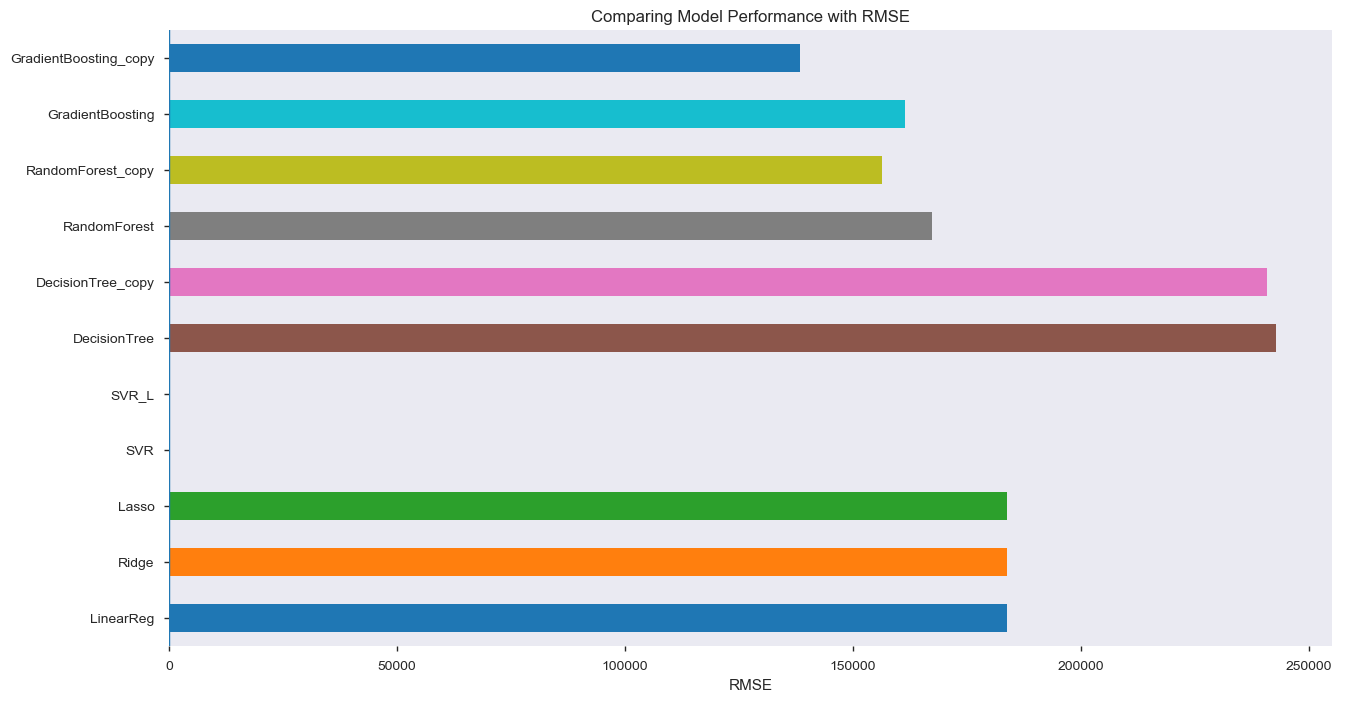

In [367]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)'].plot(kind='barh', ax=ax)
ax.axvline(min(evaluation_matrix.loc['Root_Mean_Squared_Error(RMSE)']))
plt.title('Comparing Model Performance with RMSE')
plt.xlabel('RMSE')
ax.grid()

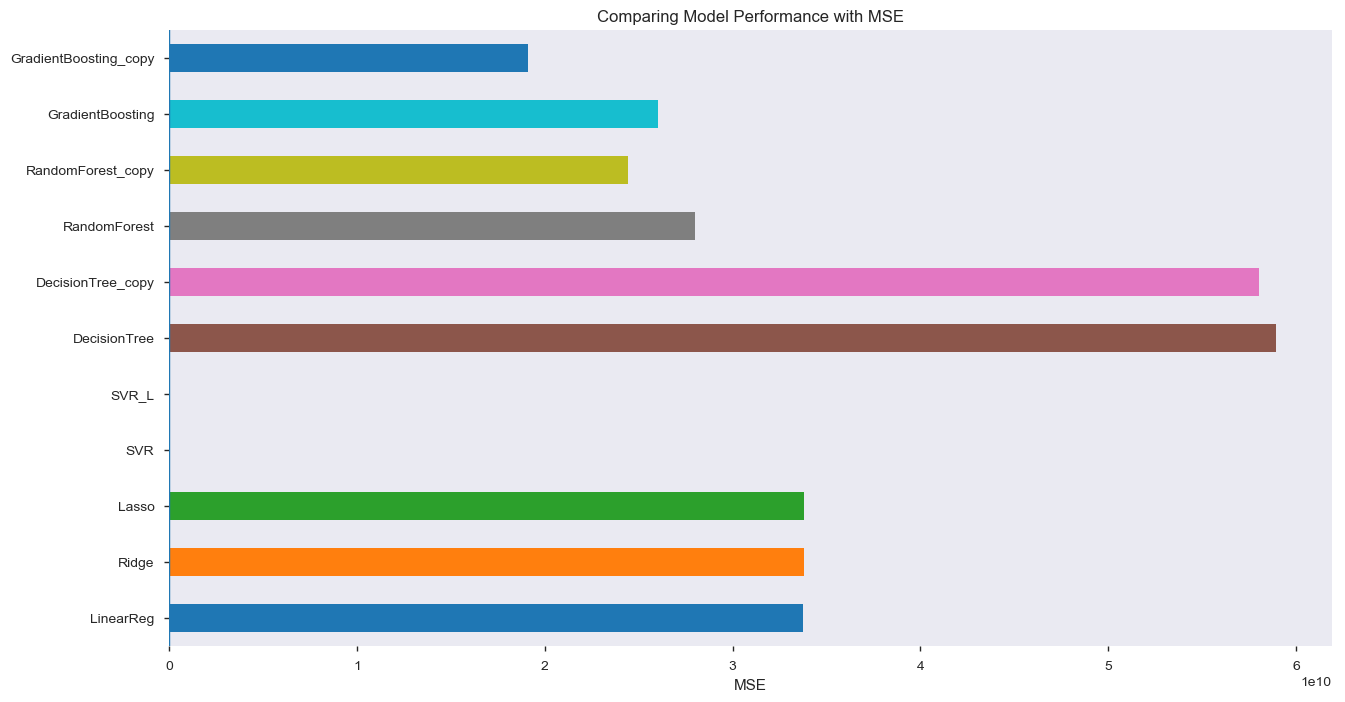

In [368]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
evaluation_matrix.loc['Mean_Squared_Error(MSE)'].plot(kind='barh', ax=ax)
ax.axvline(min(evaluation_matrix.loc['Mean_Squared_Error(MSE)']))
plt.title('Comparing Model Performance with MSE')
plt.xlabel('MSE')
ax.grid()

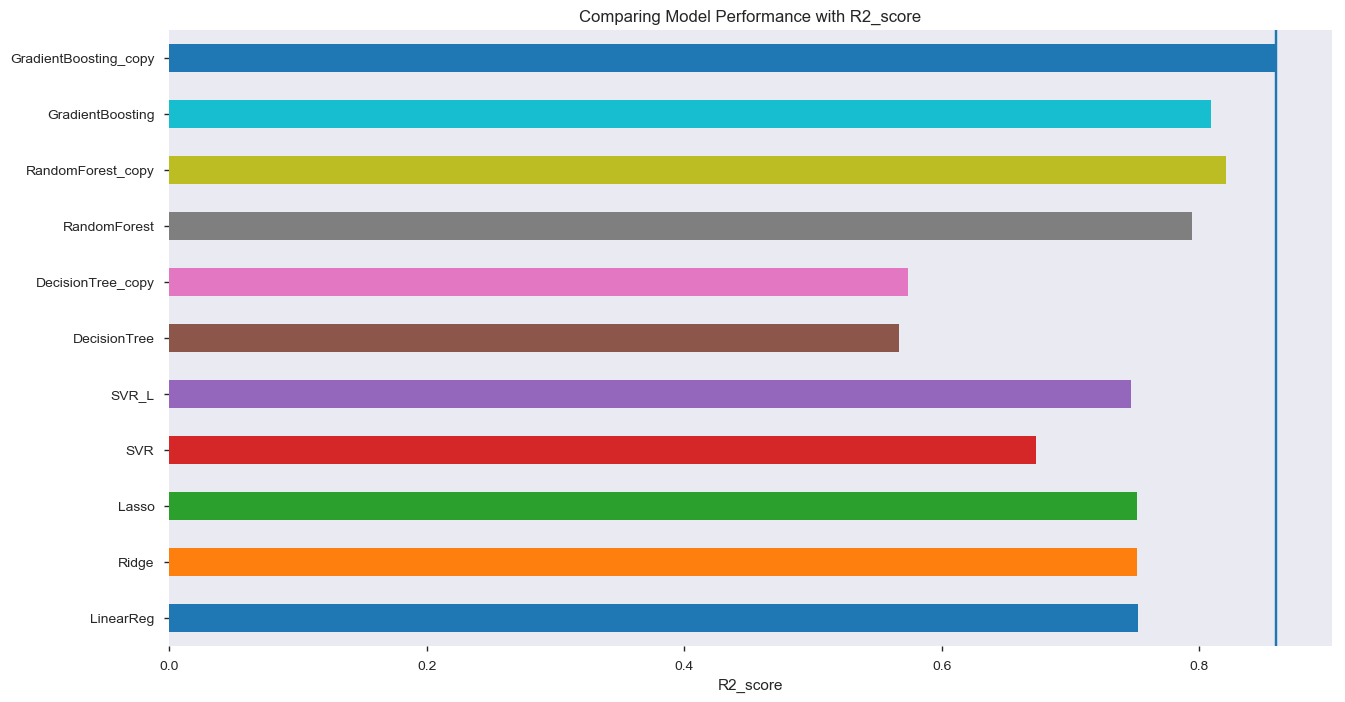

In [369]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
evaluation_matrix.loc['R2_score'].plot(kind='barh', ax=ax)
ax.axvline(max(evaluation_matrix.loc['R2_score']))
plt.title('Comparing Model Performance with R2_score')
plt.xlabel('R2_score')
ax.grid()

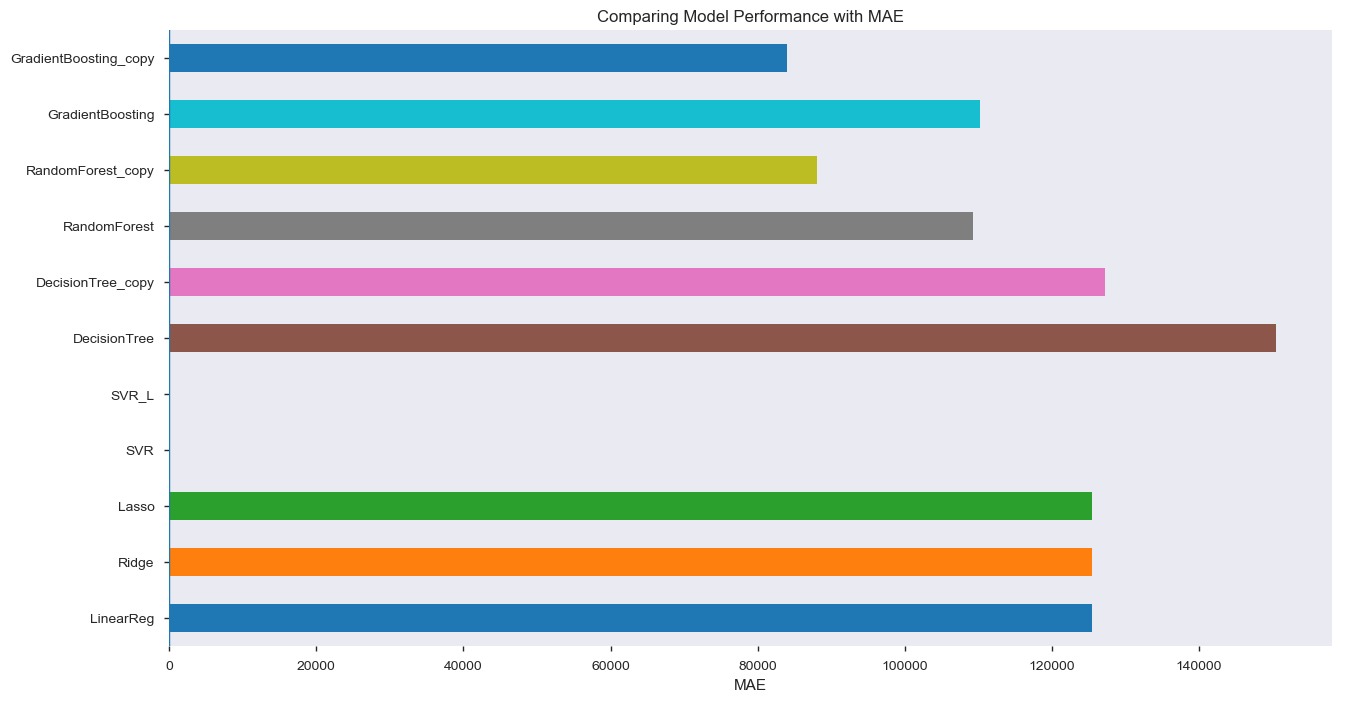

In [370]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
evaluation_matrix.loc['Mean_Absolute_Error(MAE)'].plot(kind='barh', ax=ax)
ax.axvline(min(evaluation_matrix.loc['Mean_Absolute_Error(MAE)']))
plt.title('Comparing Model Performance with MAE')
plt.xlabel('MAE')
ax.grid()

According to the R2_score, Gradient Boosting Regressor model (with h_data_copy dataset) is the better performing model. Rondom Forest Regressor model (with h_data_copy dataset) is the second better performing model.

## Hyperparameter Tuning

### Linear Regraession GridSearch CV

In [162]:
#Preparing a dataframe for model analysis after parameter tuning
#Data frame for evaluation metrics for tuned models
tuned_metrics = pd.DataFrame(index=['Mean_Squared_Error(MSE)', 'Root_Mean_Squared_Error(RMSE)', 'R2_score', 'Mean_Absolute_Error(MAE)'], columns=['LinearReg_GSCV','Ridge_GSCV','Lasso_GSCV','DecisionTree_GSCV', 'RandomForest_GSCV','GradientBoostRegressor_GSCV'])

In [163]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [164]:
# setup the hyperparameter grid, fir the model and predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
parameters = {'copy_X':[True, False], 'fit_intercept':[True,False], 'normalize':[True,False]}
grid_search_lr = GridSearchCV(estimator = lr, param_grid = parameters, cv=5)
grid_search_lr.fit(X_train, y_train)
grid_search_lr_predict = grid_search_lr.predict(X_test)

In [165]:
# Find the best score and parameters
print(grid_search_lr)
print(grid_search_lr.best_score_)
print(grid_search_lr.best_params_)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'copy_X': [True, False], 'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.7465677965136445
{'copy_X': True, 'fit_intercept': True, 'normalize': False}


In [166]:
MSE_lr_GSCV = mean_squared_error(y_test, grid_search_lr_predict)
RMSE_lr_GSCV = np.sqrt(MSE_lr_GSCV)
R2_score_lr_GSCV = r2_score(y_test, grid_search_lr_predict)
MAE_lr_GSCV = mean_absolute_error(y_test, grid_search_lr_predict)

In [167]:
#entering metrics score to the metics dataframe
tuned_metrics.loc['Mean_Squared_Error(MSE)','LinearReg_GSCV'] = MSE_lr_GSCV
tuned_metrics.loc['Root_Mean_Squared_Error(RMSE)','LinearReg_GSCV'] = RMSE_lr_GSCV
tuned_metrics.loc['R2_score','LinearReg_GSCV'] = R2_score_lr_GSCV
tuned_metrics.loc['Mean_Absolute_Error(MAE)','LinearReg_GSCV'] = MAE_lr_GSCV

In [168]:
tuned_metrics

LinearReg_GSCV Ridge_GSCV Lasso_GSCV  \
Mean_Squared_Error(MSE)          3.37764e+10        NaN        NaN   
Root_Mean_Squared_Error(RMSE)         183784        NaN        NaN   
R2_score                            0.751971        NaN        NaN   
Mean_Absolute_Error(MAE)              125387        NaN        NaN   

                              DecisionTree_GSCV RandomForest_GSCV  \
Mean_Squared_Error(MSE)                     NaN               NaN   
Root_Mean_Squared_Error(RMSE)               NaN               NaN   
R2_score                                    NaN               NaN   
Mean_Absolute_Error(MAE)                    NaN               NaN   

                              GradientBoostRegressor_GSCV  
Mean_Squared_Error(MSE)                               NaN  
Root_Mean_Squared_Error(RMSE)                         NaN  
R2_score                                              NaN  
Mean_Absolute_Error(MAE)                              NaN

### Ridge Regression GridSearch CV

In [169]:
ridge.get_params()

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': True,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
parameters = {'alpha':[0.0001, 0.001,0.01,0.1,1]}
grid_search_ridge = GridSearchCV(estimator = ridge, param_grid = parameters, cv=5)
grid_search_ridge.fit(X_train, y_train)
grid_search_ridge_predict = grid_search_ridge.predict(X_test)

In [172]:
print(grid_search_ridge)
print(grid_search_ridge.best_score_)
print(grid_search_ridge.best_params_)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.7468473262598667
{'alpha': 0.01}


In [173]:
MSE_ridge_GSCV = mean_squared_error(y_test, grid_search_ridge_predict)
RMSE_ridge_GSCV = np.sqrt(MSE_ridge_GSCV)
R2_score_ridge_GSCV = r2_score(y_test, grid_search_ridge_predict)
MAE_ridge_GSCV = mean_absolute_error(y_test, grid_search_ridge_predict)

In [174]:
tuned_metrics.loc['Mean_Squared_Error(MSE)','Ridge_GSCV'] = MSE_ridge_GSCV
tuned_metrics.loc['Root_Mean_Squared_Error(RMSE)','Ridge_GSCV'] = RMSE_ridge_GSCV
tuned_metrics.loc['R2_score','Ridge_GSCV'] = R2_score_ridge_GSCV
tuned_metrics.loc['Mean_Absolute_Error(MAE)','Ridge_GSCV'] = MAE_ridge_GSCV

In [176]:
tuned_metrics

LinearReg_GSCV  Ridge_GSCV Lasso_GSCV  \
Mean_Squared_Error(MSE)          3.37764e+10  3.3788e+10        NaN   
Root_Mean_Squared_Error(RMSE)         183784      183815        NaN   
R2_score                            0.751971    0.751886        NaN   
Mean_Absolute_Error(MAE)              125387      125394        NaN   

                              DecisionTree_GSCV RandomForest_GSCV  \
Mean_Squared_Error(MSE)                     NaN               NaN   
Root_Mean_Squared_Error(RMSE)               NaN               NaN   
R2_score                                    NaN               NaN   
Mean_Absolute_Error(MAE)                    NaN               NaN   

                              GradientBoostRegressor_GSCV  
Mean_Squared_Error(MSE)                               NaN  
Root_Mean_Squared_Error(RMSE)                         NaN  
R2_score                                              NaN  
Mean_Absolute_Error(MAE)                              NaN

### Lasso Regression GridSearch CV

In [177]:
lasso.get_params()

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
parameters = {'alpha':[0.0001, 0.001,0.01,0.1,1,2,3,10]}
grid_search_lasso = GridSearchCV(estimator = lasso, param_grid = parameters, cv=5)
grid_search_lasso.fit(X_train, y_train)
grid_search_lasso_predict = grid_search_lasso.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

In [179]:
print(grid_search_lasso)
print(grid_search_lasso.best_score_)
print(grid_search_lasso.best_params_)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.746743850922581
{'alpha': 10}


In [180]:
MSE_lasso_GSCV = mean_squared_error(y_test, grid_search_lasso_predict)
RMSE_lasso_GSCV = np.sqrt(MSE_lasso_GSCV)
R2_score_lasso_GSCV = r2_score(y_test, grid_search_lasso_predict)
MAE_lasso_GSCV = mean_absolute_error(y_test, grid_search_lasso_predict)

In [181]:
tuned_metrics.loc['Mean_Squared_Error(MSE)','Lasso_GSCV'] = MSE_lasso_GSCV
tuned_metrics.loc['Root_Mean_Squared_Error(RMSE)','Lasso_GSCV'] = RMSE_lasso_GSCV
tuned_metrics.loc['R2_score','Lasso_GSCV'] = R2_score_lasso_GSCV
tuned_metrics.loc['Mean_Absolute_Error(MAE)','Lasso_GSCV'] = MAE_lasso_GSCV

In [182]:
tuned_metrics

LinearReg_GSCV  Ridge_GSCV   Lasso_GSCV  \
Mean_Squared_Error(MSE)          3.37764e+10  3.3788e+10  3.37639e+10   
Root_Mean_Squared_Error(RMSE)         183784      183815       183749   
R2_score                            0.751971    0.751886     0.752063   
Mean_Absolute_Error(MAE)              125387      125394       125386   

                              DecisionTree_GSCV RandomForest_GSCV  \
Mean_Squared_Error(MSE)                     NaN               NaN   
Root_Mean_Squared_Error(RMSE)               NaN               NaN   
R2_score                                    NaN               NaN   
Mean_Absolute_Error(MAE)                    NaN               NaN   

                              GradientBoostRegressor_GSCV  
Mean_Squared_Error(MSE)                               NaN  
Root_Mean_Squared_Error(RMSE)                         NaN  
R2_score                                              NaN  
Mean_Absolute_Error(MAE)                              NaN

### Decision Tree Regression GridSearch CV

In [183]:
DT.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size = 0.3, random_state=42)

param_grid = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [16, 18, 20],
    'min_samples_split': [2, 4, 6, 12]
}

grid_search_DT = GridSearchCV(estimator = DT, param_grid = param_grid, cv = 5)
grid_search_DT.fit(X_train, y_train)
grid_search_DT_predict = grid_search_DT.predict(X_test)

In [185]:
print(grid_search_DT)
print(grid_search_DT.best_score_)
print(grid_search_DT.best_params_)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [16, 18, 20], 'min_samples_split': [2, 4, 6, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.6749808284354762
{'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 12}


In [186]:
MSE_DT_GSCV = mean_squared_error(y_test, grid_search_DT_predict)
RMSE_DT_GSCV = np.sqrt(MSE_DT_GSCV)
R2_score_DT_GSCV = r2_score(y_test, grid_search_DT_predict)
MAE_DT_GSCV = mean_absolute_error(y_test, grid_search_DT_predict)

In [187]:
tuned_metrics.loc['Mean_Squared_Error(MSE)','DecisionTree_GSCV'] = MSE_DT_GSCV
tuned_metrics.loc['Root_Mean_Squared_Error(RMSE)','DecisionTree_GSCV'] = RMSE_DT_GSCV
tuned_metrics.loc['R2_score','DecisionTree_GSCV'] = R2_score_DT_GSCV
tuned_metrics.loc['Mean_Absolute_Error(MAE)','DecisionTree_GSCV'] = MAE_DT_GSCV

In [188]:
tuned_metrics

LinearReg_GSCV  Ridge_GSCV   Lasso_GSCV  \
Mean_Squared_Error(MSE)          3.37764e+10  3.3788e+10  3.37639e+10   
Root_Mean_Squared_Error(RMSE)         183784      183815       183749   
R2_score                            0.751971    0.751886     0.752063   
Mean_Absolute_Error(MAE)              125387      125394       125386   

                              DecisionTree_GSCV RandomForest_GSCV  \
Mean_Squared_Error(MSE)             4.19655e+10               NaN   
Root_Mean_Squared_Error(RMSE)            204855               NaN   
R2_score                               0.691836               NaN   
Mean_Absolute_Error(MAE)                 111556               NaN   

                              GradientBoostRegressor_GSCV  
Mean_Squared_Error(MSE)                               NaN  
Root_Mean_Squared_Error(RMSE)                         NaN  
R2_score                                              NaN  
Mean_Absolute_Error(MAE)                              NaN

### Random Forest Regression RandomizedSearch CV

I am going to use RandomizedSearchCV instead of GridSearchCV inorder to reduce some computational time.

In [189]:
from sklearn.model_selection import RandomizedSearchCV
from time import time

In [190]:
RF.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size = 0.3, random_state=42)
# setup the hyperparameter grid
param_dist = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8],
    'n_estimators': [ 400, 500, 600]
}

# Instantiate the grid search model for RandomForestRegressor
randomized_search_RF = RandomizedSearchCV(estimator = RF, param_distributions= param_dist, n_iter = 10, cv = 5)

start = time()

# Fit it to the data
randomized_search_RF.fit(X_train, y_train)

print('RandomizedSearchCV took %.2f seconds for %d candidates'
      ' parameter settings.' % ((time() - start), randomized_search_RF.n_iter))

randomized_search_RF_predict = randomized_search_RF.predict(X_test)

RandomizedSearchCV took 1789.20 seconds for 10 candidates parameter settings.


In [192]:
print(randomized_search_RF)
print(randomized_search_RF.best_score_)
print(randomized_search_RF.best_params_)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [2, 4, 6, 8], 'n_estimators': [400, 500, 600]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)
0.8033663790850263
{'n_estimators': 400, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 100, 'bootstrap': True}


In [193]:
MSE_RF_GSCV = mean_squared_error(y_test, randomized_search_RF_predict)
RMSE_RF_GSCV = np.sqrt(MSE_RF_GSCV)
R2_score_RF_GSCV = r2_score(y_test, randomized_search_RF_predict)
MAE_RF_GSCV = mean_absolute_error(y_test, randomized_search_RF_predict)

In [194]:
tuned_metrics.loc['Mean_Squared_Error(MSE)','RandomForest_GSCV'] = MSE_RF_GSCV
tuned_metrics.loc['Root_Mean_Squared_Error(RMSE)','RandomForest_GSCV'] = RMSE_RF_GSCV
tuned_metrics.loc['R2_score','RandomForest_GSCV'] = R2_score_RF_GSCV
tuned_metrics.loc['Mean_Absolute_Error(MAE)','RandomForest_GSCV'] = MAE_RF_GSCV

In [195]:
tuned_metrics

LinearReg_GSCV  Ridge_GSCV   Lasso_GSCV  \
Mean_Squared_Error(MSE)          3.37764e+10  3.3788e+10  3.37639e+10   
Root_Mean_Squared_Error(RMSE)         183784      183815       183749   
R2_score                            0.751971    0.751886     0.752063   
Mean_Absolute_Error(MAE)              125387      125394       125386   

                              DecisionTree_GSCV RandomForest_GSCV  \
Mean_Squared_Error(MSE)             4.19655e+10       2.47025e+10   
Root_Mean_Squared_Error(RMSE)            204855            157170   
R2_score                               0.691836          0.818603   
Mean_Absolute_Error(MAE)                 111556           88326.1   

                              GradientBoostRegressor_GSCV  
Mean_Squared_Error(MSE)                               NaN  
Root_Mean_Squared_Error(RMSE)                         NaN  
R2_score                                              NaN  
Mean_Absolute_Error(MAE)                              NaN

### Gradient Boost Regression RandomizedSearch CV

In [196]:
gbr.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size = 0.3, random_state=42)

param_dist = {
    'n_estimators': [100,200,300,400],
    'max_depth': [10, 20, 30, 40, 50, 60, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [16, 18, 20],
    'min_samples_split': [2, 4, 6, 8]
}

randomized_search_gbr = RandomizedSearchCV(estimator = gbr, param_distributions = param_dist, n_iter=10, cv = 5)

start = time()

randomized_search_gbr.fit(X_train, y_train)

print('RandomizedSearchCV took %.2f seconds for %d candidates'
      ' parameter settings.' % ((time() - start), randomized_search_gbr.n_iter))

randomized_search_gbr_predict = randomized_search_gbr.predict(X_test)

RandomizedSearchCV took 1927.65 seconds for 10 candidates parameter settings.


In [198]:
print(randomized_search_gbr)
print(randomized_search_gbr.best_score_)
print(randomized_search_gbr.best_params_)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400], 'max_depth': [10, 20, 30, 40, 50, 60, 100], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [16, 18, 20], 'min_samples_split': [2, 4, 6, 8]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)
0.8278637077223621
{'n_estimators': 300, 'min_samples_split': 4, 'min_sampl

In [199]:
MSE_GBR_GSCV = mean_squared_error(y_test, randomized_search_gbr_predict)
RMSE_GBR_GSCV = np.sqrt(MSE_GBR_GSCV)
R2_score_GBR_GSCV = r2_score(y_test, randomized_search_gbr_predict)
MAE_GBR_GSCV = mean_absolute_error(y_test, randomized_search_gbr_predict)

In [200]:
tuned_metrics.loc['Mean_Squared_Error(MSE)','GradientBoostRegressor_GSCV'] = MSE_GBR_GSCV
tuned_metrics.loc['Root_Mean_Squared_Error(RMSE)','GradientBoostRegressor_GSCV'] = RMSE_GBR_GSCV
tuned_metrics.loc['R2_score','GradientBoostRegressor_GSCV'] = R2_score_GBR_GSCV
tuned_metrics.loc['Mean_Absolute_Error(MAE)','GradientBoostRegressor_GSCV'] = MAE_GBR_GSCV

In [201]:
tuned_metrics

LinearReg_GSCV  Ridge_GSCV   Lasso_GSCV  \
Mean_Squared_Error(MSE)          3.37764e+10  3.3788e+10  3.37639e+10   
Root_Mean_Squared_Error(RMSE)         183784      183815       183749   
R2_score                            0.751971    0.751886     0.752063   
Mean_Absolute_Error(MAE)              125387      125394       125386   

                              DecisionTree_GSCV RandomForest_GSCV  \
Mean_Squared_Error(MSE)             4.19655e+10       2.47025e+10   
Root_Mean_Squared_Error(RMSE)            204855            157170   
R2_score                               0.691836          0.818603   
Mean_Absolute_Error(MAE)                 111556           88326.1   

                              GradientBoostRegressor_GSCV  
Mean_Squared_Error(MSE)                       2.25726e+10  
Root_Mean_Squared_Error(RMSE)                      150242  
R2_score                                         0.834243  
Mean_Absolute_Error(MAE)                          83265.6

In [202]:
print(tuned_metrics)

                              LinearReg_GSCV  Ridge_GSCV   Lasso_GSCV  \
Mean_Squared_Error(MSE)          3.37764e+10  3.3788e+10  3.37639e+10   
Root_Mean_Squared_Error(RMSE)         183784      183815       183749   
R2_score                            0.751971    0.751886     0.752063   
Mean_Absolute_Error(MAE)              125387      125394       125386   

                              DecisionTree_GSCV RandomForest_GSCV  \
Mean_Squared_Error(MSE)             4.19655e+10       2.47025e+10   
Root_Mean_Squared_Error(RMSE)            204855            157170   
R2_score                               0.691836          0.818603   
Mean_Absolute_Error(MAE)                 111556           88326.1   

                              GradientBoostRegressor_GSCV  
Mean_Squared_Error(MSE)                       2.25726e+10  
Root_Mean_Squared_Error(RMSE)                      150242  
R2_score                                         0.834243  
Mean_Absolute_Error(MAE)                        

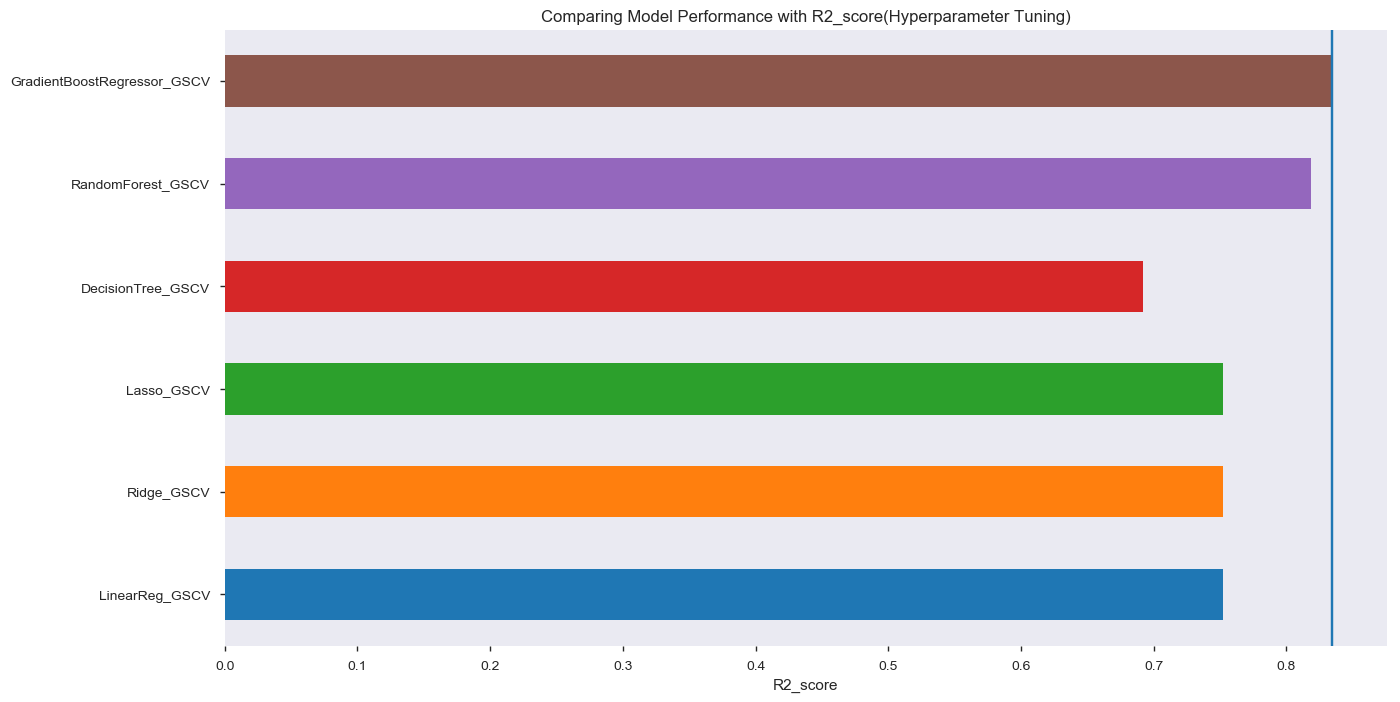

In [372]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
tuned_metrics.loc['R2_score'].plot(kind='barh', ax=ax)
ax.axvline(max(tuned_metrics.loc['R2_score']))
plt.title("Comparing Model Performance with R2_score(Hyperparameter Tuning)")
plt.xlabel('R2_score')
ax.grid()